# Spiking Neural Networks for Sequence Decision making inspired by Transformer - Reinforcement Learning Frameworks 

This is an research project code. Coding here to get free GPUs and free datasets, no need to do the download and all sort of things.

This research implementation has involved major steps:
- **Step - 1:** Understand the task
- **Step - 2:** Build a baseline transformer Reinforcement Learning Agent
- **Step - 3:** Replace layers with spiking equivalents
- **Step - 4:** Encode inputs as spike trains
- **Step - 5:** Benchmarking and Visualising

We will select the sequential decision-making environment -> Cartpole-v1.

## **Step-1: Understand the Task**
This is a computational neuroscience + deep learning + reinforcement learning project that aims to mimic the sequential decision-making capabilities of transformer-based RL agents using biologically inspired spiking neural networks (SNNs)

**Goal:**
Build and compare two models:
- A transformer-based reinforcement learning agent (like Decision Transformer)
- An equivalent spiking version of this agent, implemented using Leaky Integrate and Fire neurons with surrogate gradient learning.
Both will be trained on a sequential decision-making task, such as balancing a pole in `CartPole-v1`

In [1]:
!pip install norse

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 3.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.1 MB/s eta 0:00:00:00:0100:01
  Created wheel for norse: filename=norse-1.1.0-py3-none-any.whl size=1539055 sha256=66235290e69067543e4f17bc3bdfa603c9d6aca6d46fbe38f8c5d

In [2]:
!pip install snntorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 3.9 MB/s eta 0:00:00


In [3]:
import torch

# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else  'cpu')
print(device)

cuda


In [4]:
# Step 1.1 : Import and Create the Environment
import gym
import warnings
warnings.filterwarnings('ignore')

# Create the environment
env = gym.make('CartPole-v1')

# Reset environment to get initial state
state = env.reset()

# Print observation space and action space
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Action Space: Discrete(2)


In [5]:
# Step 1.2: Run a Random Agent (For testing)
state = env.reset()
total_reward = 0

for step in range(100):
    action = env.action_space.sample()  # Take a random action
    next_state, reward, done, info = env.step(action)
    total_reward += reward
    if done:
        break

print(f"Episode finished after {step+1} steps")
print(f"Total reward: {total_reward}")

Episode finished after 23 steps
Total reward: 23.0


In [6]:
# Step 1.3: Run multiple episodes with random agent
num_episodes = 50
all_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False
    steps = 0

    while not done and steps < 200:
        action = env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        total_reward += reward
        steps += 1

    all_rewards.append(total_reward)
    print(f"Episode {episode+1} | Total Reward: {total_reward}")

Episode 1 | Total Reward: 23.0
Episode 2 | Total Reward: 9.0
Episode 3 | Total Reward: 45.0
Episode 4 | Total Reward: 17.0
Episode 5 | Total Reward: 11.0
Episode 6 | Total Reward: 18.0
Episode 7 | Total Reward: 16.0
Episode 8 | Total Reward: 21.0
Episode 9 | Total Reward: 13.0
Episode 10 | Total Reward: 23.0
Episode 11 | Total Reward: 14.0
Episode 12 | Total Reward: 13.0
Episode 13 | Total Reward: 11.0
Episode 14 | Total Reward: 12.0
Episode 15 | Total Reward: 25.0
Episode 16 | Total Reward: 49.0
Episode 17 | Total Reward: 15.0
Episode 18 | Total Reward: 39.0
Episode 19 | Total Reward: 23.0
Episode 20 | Total Reward: 39.0
Episode 21 | Total Reward: 20.0
Episode 22 | Total Reward: 47.0
Episode 23 | Total Reward: 24.0
Episode 24 | Total Reward: 38.0
Episode 25 | Total Reward: 22.0
Episode 26 | Total Reward: 11.0
Episode 27 | Total Reward: 30.0
Episode 28 | Total Reward: 14.0
Episode 29 | Total Reward: 14.0
Episode 30 | Total Reward: 25.0
Episode 31 | Total Reward: 22.0
Episode 32 | Total

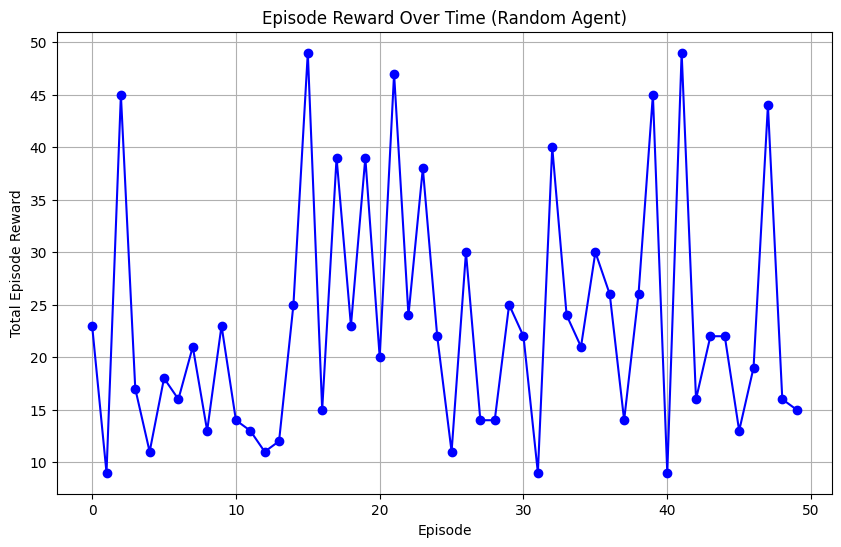

In [7]:
# Step 1.4: Plot the Rewards
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(all_rewards, marker="o", linestyle="-", color="b")
plt.title("Episode Reward Over Time (Random Agent)")
plt.xlabel("Episode")
plt.ylabel("Total Episode Reward")
plt.grid(True)
plt.show()

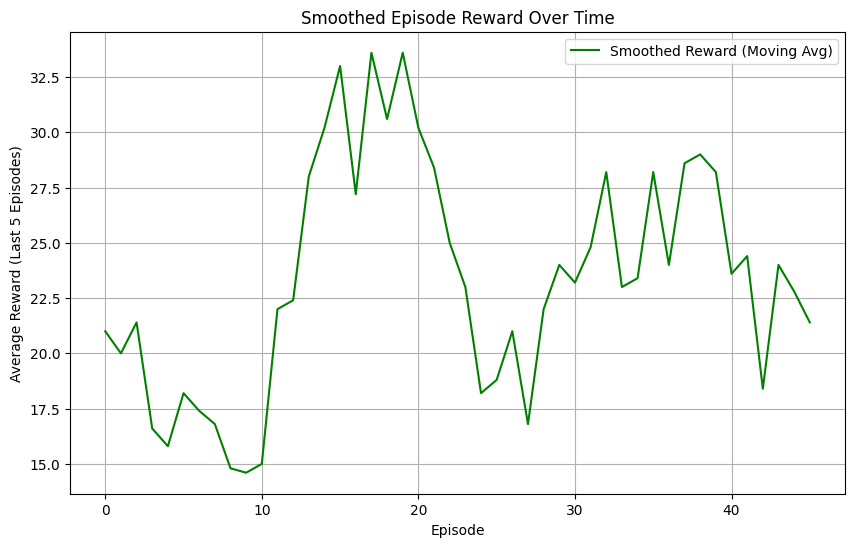

In [8]:
# Step 1.5: Moving Average for Smoother Visualization [OPTIONAL]
import numpy as np
def moving_average(a, window_size=10):
    return np.convolve(a, np.ones(window_size), 'valid') / window_size

smoothed_rewards = moving_average(all_rewards, window_size=5)

plt.figure(figsize=(10, 6))
plt.plot(smoothed_rewards, label='Smoothed Reward (Moving Avg)', color='green')
plt.title("Smoothed Episode Reward Over Time")
plt.xlabel("Episode")
plt.ylabel("Average Reward (Last 5 Episodes)")
plt.legend()
plt.grid()
plt.show()

## **Step-2: Build a baseline transformer RL agent**

In [9]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.nn import TransformerEncoder, TransformerEncoderLayer

In [10]:
# Step 2.1: Define the Transformer-Based Model
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class TransformerDecisionModel(nn.Module):
    def __init__(self, state_dim=4, act_dim=2, hidden_size=64, nhead=4, num_layers=2):
        super().__init__()
        self.embed = nn.Linear(state_dim, hidden_size)
        self.pos_encoder = PositionalEncoding(hidden_size)
        encoder_layer = TransformerEncoderLayer(d_model=hidden_size, nhead=nhead)
        self.transformer = TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.head = nn.Linear(hidden_size, act_dim)

    def forward(self, x):
        # x shape: [batch_size, seq_len, state_dim]
        x = self.embed(x)  # [bs, seq_len, hidden]
        x = self.pos_encoder(x)  # [bs, seq_len, hidden]
        x = x.transpose(0, 1)  # [seq_len, bs, hidden]
        x = self.transformer(x)  # [seq_len, bs, hidden]
        x = x.transpose(0, 1)  # [bs, seq_len, hidden]
        return self.head(x)  # [bs, seq_len, act_dim]

In [11]:
# Step 2.2: Collect Trajectories from Environment

def collect_trajectory(env, model=None, render=False):
    state = env.reset()
    done = False
    steps = 0
    states, actions, rewards = [], [], []

    while not done and steps < 200:
        if render:
            env.render()

        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # [1, 4]

        if model is None:
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                logits = model(state_tensor)  # Could be [1, T, 2]
                action_probs = torch.softmax(logits.squeeze(), dim=-1)  # Flatten to [2] or [T, 2]

                if len(action_probs.shape) == 2:
                    action_probs = action_probs[-1]  # Take last time step

                action = torch.multinomial(action_probs, 1).item()

        next_state, reward, done, _ = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)

        state = next_state
        steps += 1

    return states, actions, rewards

In [12]:
# Step 2.3: Train the model using policy gradients
# Hyperparameters
learning_rate = 1e-3
num_episodes = 100
gamma = 0.99  # Discount factor

# Initialize model and optimizer
model = TransformerDecisionModel()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
all_rewards = []

for episode in range(num_episodes):
    states, actions, rewards = collect_trajectory(env, model)

    # Compute discounted returns
    returns = []
    R = 0
    for r in reversed(rewards):
        R = r + gamma * R
        returns.insert(0, R)

    # Normalize returns
    returns = torch.tensor(returns, dtype=torch.float32)
    returns = (returns - returns.mean()) / (returns.std() + 1e-8)

    # Convert to tensors
    states_tensor = torch.tensor(np.array(states), dtype=torch.float32).unsqueeze(0)  # Add batch dim
    actions_tensor = torch.tensor(actions, dtype=torch.long)

    # Forward pass
    logits = model(states_tensor)  # [1, T, 2]
    action_logits = logits.view(-1, 2)  # Flatten to [T, 2]

    # actions_tensor is already shape [T]
    loss = nn.CrossEntropyLoss(reduction='none')(action_logits, actions_tensor)
    loss = (loss * returns).mean()

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Log
    total_reward = sum(rewards)
    all_rewards.append(total_reward)
    print(f"Episode {episode+1} | Total Reward: {total_reward:.2f} | Loss: {loss.item():.4f}")

Episode 1 | Total Reward: 20.00 | Loss: 0.1449
Episode 2 | Total Reward: 16.00 | Loss: 0.5005
Episode 3 | Total Reward: 11.00 | Loss: 0.0070
Episode 4 | Total Reward: 10.00 | Loss: -0.0017
Episode 5 | Total Reward: 9.00 | Loss: 0.0358
Episode 6 | Total Reward: 10.00 | Loss: -0.1508
Episode 7 | Total Reward: 15.00 | Loss: 0.0721
Episode 8 | Total Reward: 10.00 | Loss: -0.0797
Episode 9 | Total Reward: 12.00 | Loss: 0.0387
Episode 10 | Total Reward: 23.00 | Loss: 0.0151
Episode 11 | Total Reward: 19.00 | Loss: 0.0429
Episode 12 | Total Reward: 16.00 | Loss: -0.0241
Episode 13 | Total Reward: 26.00 | Loss: -0.0067
Episode 14 | Total Reward: 12.00 | Loss: -0.1290
Episode 15 | Total Reward: 9.00 | Loss: -0.1373
Episode 16 | Total Reward: 10.00 | Loss: -0.3810
Episode 17 | Total Reward: 10.00 | Loss: 0.0110
Episode 18 | Total Reward: 9.00 | Loss: 0.0066
Episode 19 | Total Reward: 10.00 | Loss: 0.0033
Episode 20 | Total Reward: 10.00 | Loss: 0.0012
Episode 21 | Total Reward: 10.00 | Loss: 0.0

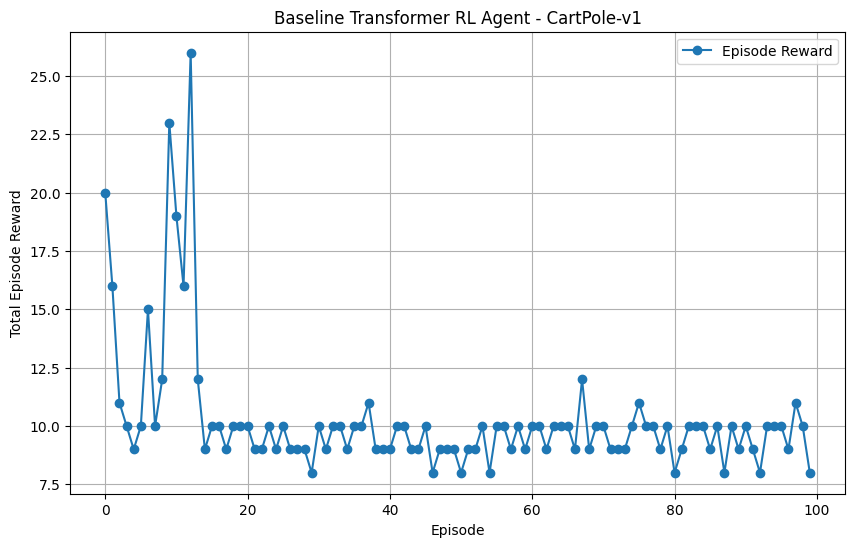

In [13]:
# Step 2.4: Plot learning curve
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(all_rewards, label="Episode Reward", marker="o", linestyle="-")
plt.title("Baseline Transformer RL Agent - CartPole-v1")
plt.xlabel("Episode")
plt.ylabel("Total Episode Reward")
plt.grid(True)
plt.legend()
plt.show()

In [14]:
import optuna
import torch.optim as optim

def collect_trajectory(env, model):
    state = env.reset()
    done = False
    states, actions, rewards = [], [], []

    while not done and len(rewards) < 200:
        state_tensor = torch.tensor(state, dtype=torch.float32).unsqueeze(0)

        if model is None:
            action = env.action_space.sample()
        else:
            with torch.no_grad():
                logits = model(state_tensor)
                action_probs = torch.softmax(logits.squeeze(), dim=-1)
                if len(action_probs.shape) == 2:
                    action_probs = action_probs[-1]
                action = torch.multinomial(action_probs, 1).item()

        next_state, reward, done, _ = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state

    return states, actions, rewards


def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    gamma = trial.suggest_float("gamma", 0.9, 0.999)
    hidden_size = trial.suggest_categorical("hidden_size", [32, 64, 128])
    num_layers = trial.suggest_int("num_layers", 1, 3)

    print(f"\nStarting Trial {trial.number}")
    print(f"Hyperparameters: lr={learning_rate}, gamma={gamma}, hidden_size={hidden_size}, num_layers={num_layers}")

    # Rebuild model
    env = gym.make('CartPole-v1')
    model = TransformerDecisionModel(hidden_size=hidden_size, num_layers=num_layers)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    all_rewards = []

    for episode in range(50):  # Shorter run per trial
        states, actions, rewards = collect_trajectory(env, model)

        # Compute discounted returns
        returns = []
        R = 0
        for r in reversed(rewards):
            R = r + gamma * R
            returns.insert(0, R)

        # Normalize returns
        returns = torch.tensor(returns, dtype=torch.float32)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Convert to tensors
        states_tensor = torch.tensor(np.array(states), dtype=torch.float32).unsqueeze(0)
        actions_tensor = torch.tensor(actions, dtype=torch.long)

        # Forward pass
        logits = model(states_tensor)  # [1, T, 2]
        action_logits = logits.view(-1, 2)  # Flatten to [T, 2]

        loss = nn.CrossEntropyLoss(reduction='none')(action_logits, actions_tensor)
        loss = (loss * returns).mean()

        # Backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_reward = sum(rewards)
        all_rewards.append(total_reward)

        print(f"Trial {trial.number} | Episode {episode+1} | Reward: {total_reward:.2f} | Loss: {loss.item():.4f}")

    avg_reward = np.mean(all_rewards[-10:])
    print(f"Trial {trial.number} completed. Avg Reward: {avg_reward:.2f}\n")

    return avg_reward  # Maximize this

In [15]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)  # Run 20 trials; increase if time allows

[I 2025-05-02 15:09:39,539] A new study created in memory with name: no-name-b26cc799-7616-43b7-b4de-d6669fa2dae9



Starting Trial 0
Hyperparameters: lr=0.002525574528293631, gamma=0.9967894579005507, hidden_size=32, num_layers=1
Trial 0 | Episode 1 | Reward: 10.00 | Loss: 0.0056
Trial 0 | Episode 2 | Reward: 12.00 | Loss: 0.0521
Trial 0 | Episode 3 | Reward: 12.00 | Loss: -0.0610
Trial 0 | Episode 4 | Reward: 14.00 | Loss: 0.1412
Trial 0 | Episode 5 | Reward: 31.00 | Loss: -0.0206
Trial 0 | Episode 6 | Reward: 14.00 | Loss: 0.0083
Trial 0 | Episode 7 | Reward: 9.00 | Loss: -0.2322
Trial 0 | Episode 8 | Reward: 11.00 | Loss: 0.2456
Trial 0 | Episode 9 | Reward: 9.00 | Loss: 0.0005
Trial 0 | Episode 10 | Reward: 9.00 | Loss: 0.0077
Trial 0 | Episode 11 | Reward: 9.00 | Loss: 0.0012
Trial 0 | Episode 12 | Reward: 9.00 | Loss: 0.0003
Trial 0 | Episode 13 | Reward: 9.00 | Loss: 0.0050
Trial 0 | Episode 14 | Reward: 10.00 | Loss: -0.0020
Trial 0 | Episode 15 | Reward: 9.00 | Loss: -0.5364
Trial 0 | Episode 16 | Reward: 9.00 | Loss: -0.0010
Trial 0 | Episode 17 | Reward: 9.00 | Loss: -0.0005
Trial 0 | Ep

[I 2025-05-02 15:09:40,493] Trial 0 finished with value: 9.6 and parameters: {'learning_rate': 0.002525574528293631, 'gamma': 0.9967894579005507, 'hidden_size': 32, 'num_layers': 1}. Best is trial 0 with value: 9.6.


Trial 0 | Episode 44 | Reward: 11.00 | Loss: 0.1744
Trial 0 | Episode 45 | Reward: 9.00 | Loss: -0.0021
Trial 0 | Episode 46 | Reward: 10.00 | Loss: 0.0002
Trial 0 | Episode 47 | Reward: 9.00 | Loss: -0.2304
Trial 0 | Episode 48 | Reward: 10.00 | Loss: -0.0021
Trial 0 | Episode 49 | Reward: 9.00 | Loss: -0.0065
Trial 0 | Episode 50 | Reward: 10.00 | Loss: -0.0086
Trial 0 completed. Avg Reward: 9.60


Starting Trial 1
Hyperparameters: lr=1.8326743893807306e-05, gamma=0.9586483564233439, hidden_size=128, num_layers=1
Trial 1 | Episode 1 | Reward: 9.00 | Loss: -0.1563
Trial 1 | Episode 2 | Reward: 21.00 | Loss: 0.0940
Trial 1 | Episode 3 | Reward: 13.00 | Loss: -0.1499
Trial 1 | Episode 4 | Reward: 10.00 | Loss: -0.1186
Trial 1 | Episode 5 | Reward: 25.00 | Loss: -0.1151
Trial 1 | Episode 6 | Reward: 36.00 | Loss: -0.0060
Trial 1 | Episode 7 | Reward: 9.00 | Loss: -0.1392
Trial 1 | Episode 8 | Reward: 30.00 | Loss: 0.0441
Trial 1 | Episode 9 | Reward: 11.00 | Loss: -0.1074
Trial 1 | Episo

[I 2025-05-02 15:09:43,397] Trial 1 finished with value: 14.7 and parameters: {'learning_rate': 1.8326743893807306e-05, 'gamma': 0.9586483564233439, 'hidden_size': 128, 'num_layers': 1}. Best is trial 1 with value: 14.7.


Trial 1 | Episode 48 | Reward: 11.00 | Loss: -0.0816
Trial 1 | Episode 49 | Reward: 16.00 | Loss: -0.1617
Trial 1 | Episode 50 | Reward: 11.00 | Loss: -0.2149
Trial 1 completed. Avg Reward: 14.70


Starting Trial 2
Hyperparameters: lr=0.0005898769889836619, gamma=0.958688474140364, hidden_size=32, num_layers=3
Trial 2 | Episode 1 | Reward: 23.00 | Loss: -0.0660
Trial 2 | Episode 2 | Reward: 18.00 | Loss: -0.0348
Trial 2 | Episode 3 | Reward: 10.00 | Loss: 0.0163
Trial 2 | Episode 4 | Reward: 9.00 | Loss: -0.0029
Trial 2 | Episode 5 | Reward: 9.00 | Loss: -0.0077
Trial 2 | Episode 6 | Reward: 10.00 | Loss: -0.0142
Trial 2 | Episode 7 | Reward: 9.00 | Loss: -0.2398
Trial 2 | Episode 8 | Reward: 9.00 | Loss: -0.0169
Trial 2 | Episode 9 | Reward: 15.00 | Loss: 0.5168
Trial 2 | Episode 10 | Reward: 9.00 | Loss: -0.0129
Trial 2 | Episode 11 | Reward: 9.00 | Loss: -0.4556
Trial 2 | Episode 12 | Reward: 10.00 | Loss: -0.0117
Trial 2 | Episode 13 | Reward: 10.00 | Loss: -0.0093
Trial 2 | Episod

[I 2025-05-02 15:09:46,603] Trial 2 finished with value: 11.6 and parameters: {'learning_rate': 0.0005898769889836619, 'gamma': 0.958688474140364, 'hidden_size': 32, 'num_layers': 3}. Best is trial 1 with value: 14.7.


Trial 2 | Episode 46 | Reward: 17.00 | Loss: 0.1797
Trial 2 | Episode 47 | Reward: 9.00 | Loss: -0.1114
Trial 2 | Episode 48 | Reward: 11.00 | Loss: -0.1117
Trial 2 | Episode 49 | Reward: 8.00 | Loss: -0.0171
Trial 2 | Episode 50 | Reward: 9.00 | Loss: -0.0183
Trial 2 completed. Avg Reward: 11.60


Starting Trial 3
Hyperparameters: lr=0.00015599372741640087, gamma=0.941700436804006, hidden_size=64, num_layers=1
Trial 3 | Episode 1 | Reward: 36.00 | Loss: 0.0226
Trial 3 | Episode 2 | Reward: 29.00 | Loss: 0.0525
Trial 3 | Episode 3 | Reward: 35.00 | Loss: 0.0009
Trial 3 | Episode 4 | Reward: 20.00 | Loss: 0.0126
Trial 3 | Episode 5 | Reward: 14.00 | Loss: -0.0796
Trial 3 | Episode 6 | Reward: 11.00 | Loss: 0.0359
Trial 3 | Episode 7 | Reward: 25.00 | Loss: -0.0555
Trial 3 | Episode 8 | Reward: 14.00 | Loss: -0.0340
Trial 3 | Episode 9 | Reward: 11.00 | Loss: -0.1070
Trial 3 | Episode 10 | Reward: 13.00 | Loss: -0.0672
Trial 3 | Episode 11 | Reward: 23.00 | Loss: 0.0954
Trial 3 | Episode

[I 2025-05-02 15:09:48,639] Trial 3 finished with value: 10.9 and parameters: {'learning_rate': 0.00015599372741640087, 'gamma': 0.941700436804006, 'hidden_size': 64, 'num_layers': 1}. Best is trial 1 with value: 14.7.


Trial 3 | Episode 46 | Reward: 10.00 | Loss: -0.1150
Trial 3 | Episode 47 | Reward: 9.00 | Loss: -0.0147
Trial 3 | Episode 48 | Reward: 10.00 | Loss: -0.0092
Trial 3 | Episode 49 | Reward: 16.00 | Loss: 0.5997
Trial 3 | Episode 50 | Reward: 8.00 | Loss: -0.0181
Trial 3 completed. Avg Reward: 10.90


Starting Trial 4
Hyperparameters: lr=0.00030726005267723064, gamma=0.9088626536745931, hidden_size=128, num_layers=3
Trial 4 | Episode 1 | Reward: 21.00 | Loss: -0.0318
Trial 4 | Episode 2 | Reward: 10.00 | Loss: -0.0024
Trial 4 | Episode 3 | Reward: 9.00 | Loss: -0.0368
Trial 4 | Episode 4 | Reward: 9.00 | Loss: -0.0886
Trial 4 | Episode 5 | Reward: 11.00 | Loss: -0.0590
Trial 4 | Episode 6 | Reward: 39.00 | Loss: 0.0331
Trial 4 | Episode 7 | Reward: 41.00 | Loss: 0.0020
Trial 4 | Episode 8 | Reward: 50.00 | Loss: 0.0039
Trial 4 | Episode 9 | Reward: 36.00 | Loss: -0.0414
Trial 4 | Episode 10 | Reward: 82.00 | Loss: -0.0513
Trial 4 | Episode 11 | Reward: 85.00 | Loss: 0.0005
Trial 4 | Epis

[I 2025-05-02 15:09:59,304] Trial 4 finished with value: 9.3 and parameters: {'learning_rate': 0.00030726005267723064, 'gamma': 0.9088626536745931, 'hidden_size': 128, 'num_layers': 3}. Best is trial 1 with value: 14.7.


Trial 4 | Episode 48 | Reward: 9.00 | Loss: -0.0000
Trial 4 | Episode 49 | Reward: 10.00 | Loss: -0.0000
Trial 4 | Episode 50 | Reward: 8.00 | Loss: -0.0000
Trial 4 completed. Avg Reward: 9.30


Starting Trial 5
Hyperparameters: lr=0.0024122541659618085, gamma=0.9149681761625539, hidden_size=32, num_layers=2
Trial 5 | Episode 1 | Reward: 47.00 | Loss: -0.0460
Trial 5 | Episode 2 | Reward: 29.00 | Loss: 0.0756
Trial 5 | Episode 3 | Reward: 10.00 | Loss: -0.2386
Trial 5 | Episode 4 | Reward: 9.00 | Loss: -0.1555
Trial 5 | Episode 5 | Reward: 12.00 | Loss: 0.1717
Trial 5 | Episode 6 | Reward: 9.00 | Loss: -0.0018
Trial 5 | Episode 7 | Reward: 8.00 | Loss: -0.0010
Trial 5 | Episode 8 | Reward: 11.00 | Loss: 0.0337
Trial 5 | Episode 9 | Reward: 9.00 | Loss: -0.3742
Trial 5 | Episode 10 | Reward: 8.00 | Loss: -0.0040
Trial 5 | Episode 11 | Reward: 10.00 | Loss: -0.0011
Trial 5 | Episode 12 | Reward: 9.00 | Loss: -0.0022
Trial 5 | Episode 13 | Reward: 10.00 | Loss: 0.1830
Trial 5 | Episode 14

[I 2025-05-02 15:10:00,879] Trial 5 finished with value: 9.1 and parameters: {'learning_rate': 0.0024122541659618085, 'gamma': 0.9149681761625539, 'hidden_size': 32, 'num_layers': 2}. Best is trial 1 with value: 14.7.


Trial 5 | Episode 44 | Reward: 9.00 | Loss: -0.0004
Trial 5 | Episode 45 | Reward: 8.00 | Loss: -0.0004
Trial 5 | Episode 46 | Reward: 9.00 | Loss: 0.0001
Trial 5 | Episode 47 | Reward: 9.00 | Loss: -0.0004
Trial 5 | Episode 48 | Reward: 9.00 | Loss: 0.0003
Trial 5 | Episode 49 | Reward: 9.00 | Loss: 0.0003
Trial 5 | Episode 50 | Reward: 10.00 | Loss: -0.0013
Trial 5 completed. Avg Reward: 9.10


Starting Trial 6
Hyperparameters: lr=0.007022771675862558, gamma=0.918828689397829, hidden_size=32, num_layers=3
Trial 6 | Episode 1 | Reward: 14.00 | Loss: 0.0176
Trial 6 | Episode 2 | Reward: 16.00 | Loss: 0.2679
Trial 6 | Episode 3 | Reward: 10.00 | Loss: -0.2136
Trial 6 | Episode 4 | Reward: 10.00 | Loss: -0.3868
Trial 6 | Episode 5 | Reward: 9.00 | Loss: 0.0012
Trial 6 | Episode 6 | Reward: 10.00 | Loss: 0.0001
Trial 6 | Episode 7 | Reward: 8.00 | Loss: 0.0007
Trial 6 | Episode 8 | Reward: 9.00 | Loss: 0.0002
Trial 6 | Episode 9 | Reward: 9.00 | Loss: 0.0006
Trial 6 | Episode 10 | Reward:

[I 2025-05-02 15:10:02,938] Trial 6 finished with value: 9.6 and parameters: {'learning_rate': 0.007022771675862558, 'gamma': 0.918828689397829, 'hidden_size': 32, 'num_layers': 3}. Best is trial 1 with value: 14.7.


Trial 6 | Episode 45 | Reward: 10.00 | Loss: -0.0022
Trial 6 | Episode 46 | Reward: 9.00 | Loss: -0.0022
Trial 6 | Episode 47 | Reward: 10.00 | Loss: -0.2763
Trial 6 | Episode 48 | Reward: 9.00 | Loss: -0.0005
Trial 6 | Episode 49 | Reward: 9.00 | Loss: 0.0013
Trial 6 | Episode 50 | Reward: 10.00 | Loss: -0.4622
Trial 6 completed. Avg Reward: 9.60


Starting Trial 7
Hyperparameters: lr=5.9998261229448165e-05, gamma=0.9330315717241126, hidden_size=128, num_layers=2
Trial 7 | Episode 1 | Reward: 10.00 | Loss: 0.0463
Trial 7 | Episode 2 | Reward: 16.00 | Loss: -0.0367
Trial 7 | Episode 3 | Reward: 27.00 | Loss: -0.0240
Trial 7 | Episode 4 | Reward: 23.00 | Loss: -0.1050
Trial 7 | Episode 5 | Reward: 24.00 | Loss: 0.0091
Trial 7 | Episode 6 | Reward: 73.00 | Loss: 0.0318
Trial 7 | Episode 7 | Reward: 24.00 | Loss: -0.0318
Trial 7 | Episode 8 | Reward: 26.00 | Loss: -0.0418
Trial 7 | Episode 9 | Reward: 10.00 | Loss: -0.2675
Trial 7 | Episode 10 | Reward: 18.00 | Loss: -0.0585
Trial 7 | Epi

[I 2025-05-02 15:10:10,960] Trial 7 finished with value: 18.4 and parameters: {'learning_rate': 5.9998261229448165e-05, 'gamma': 0.9330315717241126, 'hidden_size': 128, 'num_layers': 2}. Best is trial 7 with value: 18.4.


Trial 7 | Episode 49 | Reward: 10.00 | Loss: -0.1501
Trial 7 | Episode 50 | Reward: 12.00 | Loss: -0.1216
Trial 7 completed. Avg Reward: 18.40


Starting Trial 8
Hyperparameters: lr=0.00013966621085665114, gamma=0.9485670161296481, hidden_size=128, num_layers=1
Trial 8 | Episode 1 | Reward: 33.00 | Loss: 0.0294
Trial 8 | Episode 2 | Reward: 41.00 | Loss: -0.0086
Trial 8 | Episode 3 | Reward: 23.00 | Loss: 0.0370
Trial 8 | Episode 4 | Reward: 20.00 | Loss: 0.0929
Trial 8 | Episode 5 | Reward: 12.00 | Loss: 0.0520
Trial 8 | Episode 6 | Reward: 25.00 | Loss: 0.0196
Trial 8 | Episode 7 | Reward: 9.00 | Loss: 0.1581
Trial 8 | Episode 8 | Reward: 41.00 | Loss: 0.0630
Trial 8 | Episode 9 | Reward: 32.00 | Loss: -0.0478
Trial 8 | Episode 10 | Reward: 33.00 | Loss: 0.0493
Trial 8 | Episode 11 | Reward: 37.00 | Loss: -0.0169
Trial 8 | Episode 12 | Reward: 27.00 | Loss: -0.0188
Trial 8 | Episode 13 | Reward: 12.00 | Loss: -0.0392
Trial 8 | Episode 14 | Reward: 15.00 | Loss: -0.0789
Trial 8 | Epis

[I 2025-05-02 15:10:15,809] Trial 8 finished with value: 42.4 and parameters: {'learning_rate': 0.00013966621085665114, 'gamma': 0.9485670161296481, 'hidden_size': 128, 'num_layers': 1}. Best is trial 8 with value: 42.4.


Trial 8 | Episode 47 | Reward: 98.00 | Loss: -0.0124
Trial 8 | Episode 48 | Reward: 26.00 | Loss: -0.0075
Trial 8 | Episode 49 | Reward: 17.00 | Loss: -0.0461
Trial 8 | Episode 50 | Reward: 20.00 | Loss: -0.0595
Trial 8 completed. Avg Reward: 42.40


Starting Trial 9
Hyperparameters: lr=1.2980697259192383e-05, gamma=0.9226999525257454, hidden_size=128, num_layers=3
Trial 9 | Episode 1 | Reward: 46.00 | Loss: 0.0652
Trial 9 | Episode 2 | Reward: 16.00 | Loss: -0.1779
Trial 9 | Episode 3 | Reward: 22.00 | Loss: -0.0496
Trial 9 | Episode 4 | Reward: 22.00 | Loss: -0.0004
Trial 9 | Episode 5 | Reward: 14.00 | Loss: -0.0145
Trial 9 | Episode 6 | Reward: 11.00 | Loss: 0.2107
Trial 9 | Episode 7 | Reward: 14.00 | Loss: 0.0564
Trial 9 | Episode 8 | Reward: 9.00 | Loss: 0.2004
Trial 9 | Episode 9 | Reward: 19.00 | Loss: -0.0366
Trial 9 | Episode 10 | Reward: 21.00 | Loss: -0.0373
Trial 9 | Episode 11 | Reward: 21.00 | Loss: 0.0132
Trial 9 | Episode 12 | Reward: 10.00 | Loss: 0.0356
Trial 9 | Ep

[I 2025-05-02 15:10:23,471] Trial 9 finished with value: 14.7 and parameters: {'learning_rate': 1.2980697259192383e-05, 'gamma': 0.9226999525257454, 'hidden_size': 128, 'num_layers': 3}. Best is trial 8 with value: 42.4.


Trial 9 | Episode 49 | Reward: 14.00 | Loss: -0.1705
Trial 9 | Episode 50 | Reward: 14.00 | Loss: -0.1412
Trial 9 completed. Avg Reward: 14.70


Starting Trial 10
Hyperparameters: lr=5.426966552112378e-05, gamma=0.979156064580519, hidden_size=64, num_layers=1
Trial 10 | Episode 1 | Reward: 12.00 | Loss: 0.0304
Trial 10 | Episode 2 | Reward: 18.00 | Loss: -0.0572
Trial 10 | Episode 3 | Reward: 16.00 | Loss: -0.0521
Trial 10 | Episode 4 | Reward: 10.00 | Loss: -0.0724
Trial 10 | Episode 5 | Reward: 17.00 | Loss: -0.0768
Trial 10 | Episode 6 | Reward: 22.00 | Loss: -0.0736
Trial 10 | Episode 7 | Reward: 16.00 | Loss: -0.0243
Trial 10 | Episode 8 | Reward: 35.00 | Loss: 0.0059
Trial 10 | Episode 9 | Reward: 12.00 | Loss: -0.0993
Trial 10 | Episode 10 | Reward: 12.00 | Loss: -0.2165
Trial 10 | Episode 11 | Reward: 18.00 | Loss: -0.1066
Trial 10 | Episode 12 | Reward: 30.00 | Loss: -0.0385
Trial 10 | Episode 13 | Reward: 59.00 | Loss: 0.0431
Trial 10 | Episode 14 | Reward: 47.00 | Loss: 0.00

[I 2025-05-02 15:10:26,051] Trial 10 finished with value: 23.0 and parameters: {'learning_rate': 5.426966552112378e-05, 'gamma': 0.979156064580519, 'hidden_size': 64, 'num_layers': 1}. Best is trial 8 with value: 42.4.


Trial 10 | Episode 47 | Reward: 52.00 | Loss: 0.0140
Trial 10 | Episode 48 | Reward: 12.00 | Loss: -0.0962
Trial 10 | Episode 49 | Reward: 41.00 | Loss: 0.0644
Trial 10 | Episode 50 | Reward: 23.00 | Loss: 0.0001
Trial 10 completed. Avg Reward: 23.00


Starting Trial 11
Hyperparameters: lr=6.353124699875798e-05, gamma=0.9809274120917085, hidden_size=64, num_layers=1
Trial 11 | Episode 1 | Reward: 14.00 | Loss: -0.2491
Trial 11 | Episode 2 | Reward: 9.00 | Loss: -0.1441
Trial 11 | Episode 3 | Reward: 20.00 | Loss: 0.0269
Trial 11 | Episode 4 | Reward: 23.00 | Loss: -0.0308
Trial 11 | Episode 5 | Reward: 11.00 | Loss: -0.2682
Trial 11 | Episode 6 | Reward: 35.00 | Loss: 0.0367
Trial 11 | Episode 7 | Reward: 46.00 | Loss: 0.0004
Trial 11 | Episode 8 | Reward: 30.00 | Loss: 0.0727
Trial 11 | Episode 9 | Reward: 14.00 | Loss: 0.0482
Trial 11 | Episode 10 | Reward: 16.00 | Loss: -0.2400
Trial 11 | Episode 11 | Reward: 26.00 | Loss: 0.0352
Trial 11 | Episode 12 | Reward: 15.00 | Loss: -0.1173

[I 2025-05-02 15:10:28,662] Trial 11 finished with value: 29.4 and parameters: {'learning_rate': 6.353124699875798e-05, 'gamma': 0.9809274120917085, 'hidden_size': 64, 'num_layers': 1}. Best is trial 8 with value: 42.4.


Trial 11 | Episode 48 | Reward: 22.00 | Loss: 0.0343
Trial 11 | Episode 49 | Reward: 20.00 | Loss: -0.1969
Trial 11 | Episode 50 | Reward: 12.00 | Loss: -0.3380
Trial 11 completed. Avg Reward: 29.40


Starting Trial 12
Hyperparameters: lr=6.251189047142571e-05, gamma=0.9745203605413221, hidden_size=64, num_layers=2
Trial 12 | Episode 1 | Reward: 9.00 | Loss: 0.1519
Trial 12 | Episode 2 | Reward: 9.00 | Loss: 0.0290
Trial 12 | Episode 3 | Reward: 11.00 | Loss: -0.0297
Trial 12 | Episode 4 | Reward: 9.00 | Loss: -0.0435
Trial 12 | Episode 5 | Reward: 17.00 | Loss: -0.0294
Trial 12 | Episode 6 | Reward: 13.00 | Loss: -0.1994
Trial 12 | Episode 7 | Reward: 16.00 | Loss: -0.3021
Trial 12 | Episode 8 | Reward: 19.00 | Loss: -0.1508
Trial 12 | Episode 9 | Reward: 12.00 | Loss: 0.0449
Trial 12 | Episode 10 | Reward: 22.00 | Loss: -0.1922
Trial 12 | Episode 11 | Reward: 10.00 | Loss: -0.1449
Trial 12 | Episode 12 | Reward: 19.00 | Loss: -0.3273
Trial 12 | Episode 13 | Reward: 20.00 | Loss: -0.4

[I 2025-05-02 15:10:31,022] Trial 12 finished with value: 9.7 and parameters: {'learning_rate': 6.251189047142571e-05, 'gamma': 0.9745203605413221, 'hidden_size': 64, 'num_layers': 2}. Best is trial 8 with value: 42.4.


Trial 12 | Episode 45 | Reward: 12.00 | Loss: 0.5051
Trial 12 | Episode 46 | Reward: 8.00 | Loss: 0.0025
Trial 12 | Episode 47 | Reward: 10.00 | Loss: 0.2526
Trial 12 | Episode 48 | Reward: 9.00 | Loss: -0.8303
Trial 12 | Episode 49 | Reward: 9.00 | Loss: 0.0042
Trial 12 | Episode 50 | Reward: 9.00 | Loss: 0.0062
Trial 12 completed. Avg Reward: 9.70


Starting Trial 13
Hyperparameters: lr=0.00019181465814330925, gamma=0.9761328536519841, hidden_size=64, num_layers=1
Trial 13 | Episode 1 | Reward: 29.00 | Loss: 0.0358
Trial 13 | Episode 2 | Reward: 15.00 | Loss: 0.0252
Trial 13 | Episode 3 | Reward: 14.00 | Loss: -0.0125
Trial 13 | Episode 4 | Reward: 13.00 | Loss: -0.0781
Trial 13 | Episode 5 | Reward: 9.00 | Loss: -0.0822
Trial 13 | Episode 6 | Reward: 9.00 | Loss: -0.0834
Trial 13 | Episode 7 | Reward: 18.00 | Loss: 0.0576
Trial 13 | Episode 8 | Reward: 13.00 | Loss: -0.0919
Trial 13 | Episode 9 | Reward: 12.00 | Loss: -0.0425
Trial 13 | Episode 10 | Reward: 12.00 | Loss: 0.0253
Tria

[I 2025-05-02 15:10:32,540] Trial 13 finished with value: 9.7 and parameters: {'learning_rate': 0.00019181465814330925, 'gamma': 0.9761328536519841, 'hidden_size': 64, 'num_layers': 1}. Best is trial 8 with value: 42.4.


Trial 13 | Episode 45 | Reward: 9.00 | Loss: -0.2478
Trial 13 | Episode 46 | Reward: 11.00 | Loss: 0.1141
Trial 13 | Episode 47 | Reward: 10.00 | Loss: -0.0026
Trial 13 | Episode 48 | Reward: 8.00 | Loss: -0.0023
Trial 13 | Episode 49 | Reward: 10.00 | Loss: -0.0017
Trial 13 | Episode 50 | Reward: 8.00 | Loss: -0.0025
Trial 13 completed. Avg Reward: 9.70


Starting Trial 14
Hyperparameters: lr=0.0005577589195434164, gamma=0.9939615010640653, hidden_size=128, num_layers=1
Trial 14 | Episode 1 | Reward: 13.00 | Loss: 0.0064
Trial 14 | Episode 2 | Reward: 27.00 | Loss: -0.0932
Trial 14 | Episode 3 | Reward: 24.00 | Loss: 0.0630
Trial 14 | Episode 4 | Reward: 15.00 | Loss: 0.0349
Trial 14 | Episode 5 | Reward: 13.00 | Loss: -0.0367
Trial 14 | Episode 6 | Reward: 10.00 | Loss: -0.3600
Trial 14 | Episode 7 | Reward: 10.00 | Loss: 0.0591
Trial 14 | Episode 8 | Reward: 9.00 | Loss: 0.0372
Trial 14 | Episode 9 | Reward: 9.00 | Loss: 0.0114
Trial 14 | Episode 10 | Reward: 10.00 | Loss: 0.0047
Tr

[I 2025-05-02 15:10:34,368] Trial 14 finished with value: 9.2 and parameters: {'learning_rate': 0.0005577589195434164, 'gamma': 0.9939615010640653, 'hidden_size': 128, 'num_layers': 1}. Best is trial 8 with value: 42.4.


Trial 14 | Episode 47 | Reward: 10.00 | Loss: -0.0000
Trial 14 | Episode 48 | Reward: 9.00 | Loss: -0.0000
Trial 14 | Episode 49 | Reward: 9.00 | Loss: -0.0001
Trial 14 | Episode 50 | Reward: 11.00 | Loss: -0.0000
Trial 14 completed. Avg Reward: 9.20


Starting Trial 15
Hyperparameters: lr=2.7888101410253975e-05, gamma=0.9504882473591045, hidden_size=64, num_layers=2
Trial 15 | Episode 1 | Reward: 10.00 | Loss: 0.0815
Trial 15 | Episode 2 | Reward: 9.00 | Loss: 0.0495
Trial 15 | Episode 3 | Reward: 9.00 | Loss: 0.0379
Trial 15 | Episode 4 | Reward: 9.00 | Loss: -0.2373
Trial 15 | Episode 5 | Reward: 11.00 | Loss: 0.0383
Trial 15 | Episode 6 | Reward: 8.00 | Loss: 0.0248
Trial 15 | Episode 7 | Reward: 11.00 | Loss: -0.0784
Trial 15 | Episode 8 | Reward: 11.00 | Loss: -0.0423
Trial 15 | Episode 9 | Reward: 9.00 | Loss: -0.3102
Trial 15 | Episode 10 | Reward: 10.00 | Loss: -0.0077
Trial 15 | Episode 11 | Reward: 10.00 | Loss: 0.0551
Trial 15 | Episode 12 | Reward: 9.00 | Loss: 0.0093
Tria

[I 2025-05-02 15:10:36,429] Trial 15 finished with value: 10.0 and parameters: {'learning_rate': 2.7888101410253975e-05, 'gamma': 0.9504882473591045, 'hidden_size': 64, 'num_layers': 2}. Best is trial 8 with value: 42.4.


Trial 15 | Episode 46 | Reward: 10.00 | Loss: -0.0259
Trial 15 | Episode 47 | Reward: 9.00 | Loss: 0.0022
Trial 15 | Episode 48 | Reward: 11.00 | Loss: 0.0272
Trial 15 | Episode 49 | Reward: 10.00 | Loss: 0.0048
Trial 15 | Episode 50 | Reward: 10.00 | Loss: 0.1752
Trial 15 completed. Avg Reward: 10.00


Starting Trial 16
Hyperparameters: lr=0.00010758308976256609, gamma=0.9681130681562926, hidden_size=128, num_layers=2
Trial 16 | Episode 1 | Reward: 19.00 | Loss: 0.0380
Trial 16 | Episode 2 | Reward: 26.00 | Loss: 0.0682
Trial 16 | Episode 3 | Reward: 31.00 | Loss: -0.0393
Trial 16 | Episode 4 | Reward: 13.00 | Loss: -0.0844
Trial 16 | Episode 5 | Reward: 40.00 | Loss: -0.0159
Trial 16 | Episode 6 | Reward: 24.00 | Loss: -0.0182
Trial 16 | Episode 7 | Reward: 35.00 | Loss: -0.0134
Trial 16 | Episode 8 | Reward: 16.00 | Loss: -0.1159
Trial 16 | Episode 9 | Reward: 9.00 | Loss: 0.0238
Trial 16 | Episode 10 | Reward: 9.00 | Loss: -0.1396
Trial 16 | Episode 11 | Reward: 10.00 | Loss: -0.20

[I 2025-05-02 15:10:40,500] Trial 16 finished with value: 10.8 and parameters: {'learning_rate': 0.00010758308976256609, 'gamma': 0.9681130681562926, 'hidden_size': 128, 'num_layers': 2}. Best is trial 8 with value: 42.4.


Trial 16 | Episode 50 | Reward: 11.00 | Loss: -0.1002
Trial 16 completed. Avg Reward: 10.80


Starting Trial 17
Hyperparameters: lr=0.0008858090212338372, gamma=0.9364483138199028, hidden_size=64, num_layers=1
Trial 17 | Episode 1 | Reward: 10.00 | Loss: -0.0492
Trial 17 | Episode 2 | Reward: 11.00 | Loss: 0.0061
Trial 17 | Episode 3 | Reward: 9.00 | Loss: -0.2298
Trial 17 | Episode 4 | Reward: 16.00 | Loss: 0.2380
Trial 17 | Episode 5 | Reward: 12.00 | Loss: -0.3549
Trial 17 | Episode 6 | Reward: 31.00 | Loss: 0.0291
Trial 17 | Episode 7 | Reward: 32.00 | Loss: 0.0631
Trial 17 | Episode 8 | Reward: 17.00 | Loss: -0.0721
Trial 17 | Episode 9 | Reward: 14.00 | Loss: -0.1130
Trial 17 | Episode 10 | Reward: 16.00 | Loss: -0.0209
Trial 17 | Episode 11 | Reward: 11.00 | Loss: -0.0086
Trial 17 | Episode 12 | Reward: 9.00 | Loss: 0.0083
Trial 17 | Episode 13 | Reward: 10.00 | Loss: -0.4409
Trial 17 | Episode 14 | Reward: 10.00 | Loss: 0.0079
Trial 17 | Episode 15 | Reward: 11.00 | Loss: 0.405

[I 2025-05-02 15:10:41,754] Trial 17 finished with value: 9.7 and parameters: {'learning_rate': 0.0008858090212338372, 'gamma': 0.9364483138199028, 'hidden_size': 64, 'num_layers': 1}. Best is trial 8 with value: 42.4.


Trial 17 | Episode 42 | Reward: 10.00 | Loss: 0.0009
Trial 17 | Episode 43 | Reward: 10.00 | Loss: 0.0008
Trial 17 | Episode 44 | Reward: 9.00 | Loss: 0.0005
Trial 17 | Episode 45 | Reward: 10.00 | Loss: 0.0010
Trial 17 | Episode 46 | Reward: 10.00 | Loss: 0.0014
Trial 17 | Episode 47 | Reward: 10.00 | Loss: 0.0014
Trial 17 | Episode 48 | Reward: 9.00 | Loss: 0.0004
Trial 17 | Episode 49 | Reward: 8.00 | Loss: 0.0006
Trial 17 | Episode 50 | Reward: 10.00 | Loss: 0.0010
Trial 17 completed. Avg Reward: 9.70


Starting Trial 18
Hyperparameters: lr=4.2162825098675283e-05, gamma=0.9003506162524727, hidden_size=64, num_layers=1
Trial 18 | Episode 1 | Reward: 16.00 | Loss: 0.0070
Trial 18 | Episode 2 | Reward: 22.00 | Loss: 0.0327
Trial 18 | Episode 3 | Reward: 24.00 | Loss: 0.0161
Trial 18 | Episode 4 | Reward: 9.00 | Loss: -0.0400
Trial 18 | Episode 5 | Reward: 43.00 | Loss: 0.0560
Trial 18 | Episode 6 | Reward: 15.00 | Loss: -0.0036
Trial 18 | Episode 7 | Reward: 9.00 | Loss: -0.0270
Trial

[I 2025-05-02 15:10:43,491] Trial 18 finished with value: 17.5 and parameters: {'learning_rate': 4.2162825098675283e-05, 'gamma': 0.9003506162524727, 'hidden_size': 64, 'num_layers': 1}. Best is trial 8 with value: 42.4.


Trial 18 | Episode 50 | Reward: 17.00 | Loss: -0.0818
Trial 18 completed. Avg Reward: 17.50


Starting Trial 19
Hyperparameters: lr=0.00011616411899821968, gamma=0.9890448425124823, hidden_size=128, num_layers=2
Trial 19 | Episode 1 | Reward: 38.00 | Loss: -0.0054
Trial 19 | Episode 2 | Reward: 27.00 | Loss: 0.0400
Trial 19 | Episode 3 | Reward: 22.00 | Loss: -0.0818
Trial 19 | Episode 4 | Reward: 10.00 | Loss: -0.1042
Trial 19 | Episode 5 | Reward: 15.00 | Loss: 0.2220
Trial 19 | Episode 6 | Reward: 9.00 | Loss: -0.3719
Trial 19 | Episode 7 | Reward: 12.00 | Loss: 0.2604
Trial 19 | Episode 8 | Reward: 9.00 | Loss: -0.2121
Trial 19 | Episode 9 | Reward: 10.00 | Loss: -0.0452
Trial 19 | Episode 10 | Reward: 9.00 | Loss: 0.0017
Trial 19 | Episode 11 | Reward: 9.00 | Loss: 0.0012
Trial 19 | Episode 12 | Reward: 10.00 | Loss: -0.0000
Trial 19 | Episode 13 | Reward: 10.00 | Loss: 0.0016
Trial 19 | Episode 14 | Reward: 9.00 | Loss: 0.0015
Trial 19 | Episode 15 | Reward: 9.00 | Loss: 0.0006
T

[I 2025-05-02 15:10:47,022] Trial 19 finished with value: 9.7 and parameters: {'learning_rate': 0.00011616411899821968, 'gamma': 0.9890448425124823, 'hidden_size': 128, 'num_layers': 2}. Best is trial 8 with value: 42.4.


Trial 19 | Episode 50 | Reward: 10.00 | Loss: 0.0002
Trial 19 completed. Avg Reward: 9.70



In [16]:
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Optional: Plot results
optuna.visualization.plot_optimization_history(study).show()
optuna.visualization.plot_param_importances(study).show()

Best trial:
  Value: 42.4
  Params: 
    learning_rate: 0.00013966621085665114
    gamma: 0.9485670161296481
    hidden_size: 128
    num_layers: 1


## **Step - 3: Replace layers with spiking equivalents**

**Abbreviations:**
- **LIF :** Leaky Integrate-and-Fire layer

In [17]:
import norse
print(norse.__version__)  # Should be at least '0.0.7'

2025-05-02 15:10:55.238960: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746198655.424718      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746198655.485120      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


1.1.0


In [18]:
# Step 3.1: Buidling a Spiking Decision Block
import torch
import torch.nn as nn
from norse.torch import LIFCell

class SpikingDecisionBlock(nn.Module):
    def __init__(self, input_size=4, hidden_size=128):
        super().__init__()
        self.lif1 = LIFCell()
        self.lif2 = LIFCell()
        self.readout = nn.Linear(input_size, 2)

    def forward(self, x):
        """
        x: Tensor of shape [batch_size, seq_len, input_size]
        """
        batch_size, seq_len, _ = x.shape
        state1 = state2 = None
        outputs = []

        for t in range(seq_len):
            xt = x[:, t]  # Input at time step t
            xt, state1 = self.lif1(xt, state1) # First LIF layer
            xt, state2 = self.lif2(xt, state2) # Second LIF layer
            out = self.readout(xt) # Readout
            outputs.append(out)

        return torch.stack(outputs, dim=1)  # Shape: [batch_size, seq_len, 2]

In [19]:
# Step 3.2: Making a Spiking Transformer Agent
class SpikingTransformerAgent(nn.Module):
    def __init__(self, input_size=4, hidden_size=128):
        super().__init__()
        self.spike_block = SpikingDecisionBlock(input_size, hidden_size)

    def forward(self, x):
        return self.spike_block(x)

In [20]:
def poisson_encode(x, time_steps=32):
    """Convert input tensor into Poisson-encoded spike trains"""
    return (torch.rand(time_steps, *x.shape) < x.unsqueeze(0)).float()

state = torch.tensor([0.1, -0.2, 0.3, 0.0], dtype=torch.float32)
encoded_input = poisson_encode(state, time_steps=32).unsqueeze(0)  # Add batch dimension [1, 32, 4]

In [21]:
# Dummy input
x = torch.randn(1, 32, 4)  # Batch size 1, 32 time steps, 4 features
# Build model
model = SpikingTransformerAgent()
# Forward pass
logits = model(x)
print("Output shape:", logits.shape)

Output shape: torch.Size([1, 32, 2])


In [22]:
# This is the custom LIF Block => To test 
class CustomLIFBlock(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lif1 = LIFCell()
        self.lif2 = LIFCell()
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Manually define linear transformations
        self.w_ih1 = nn.Linear(input_size, hidden_size)
        self.w_hh1 = nn.Linear(hidden_size, hidden_size)

        self.w_ih2 = nn.Linear(hidden_size, hidden_size)
        self.w_hh2 = nn.Linear(hidden_size, hidden_size)

    def initial_state(self, batch_size):
        return None  # Use default state initialization

    def forward(self, x):
        """
        x: Tensor of shape [batch_size, seq_len, input_size]
        Returns: Output tensor [batch_size, seq_len, hidden_size]
        """
        batch_size, seq_len, _ = x.shape
        state1 = state2 = None
        outputs = []

        for t in range(seq_len):
            xt = x[:, t]  # Input at time step t

            # First LIF layer with Linear
            xt = self.w_ih1(xt)
            xt, state1 = self.lif1(xt, state1)

            # Second LIF layer with Linear
            xt = self.w_hh1(xt)
            xt = self.w_ih2(xt)
            xt, state2 = self.lif2(xt, state2)

            outputs.append(xt)

        return torch.stack(outputs, dim=1)  # Shape: [batch_size, seq_len, hidden_size]

class SpikingDecisionModel(nn.Module):
    def __init__(self, input_size=4, hidden_size=128, output_size=2):
        super().__init__()
        self.spike_block = CustomLIFBlock(input_size, hidden_size)
        self.readout = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.spike_block(x)
        return x  # Output shape: [batch_size, seq_len, output_size]


# Dummy input
x = torch.randn(1, 32, 4)  # Batch size 1, 32 time steps, 4 features
# Build model
model = SpikingDecisionModel()
# Forward pass
logits = model(x)
print("Output shape:", logits.shape)

Output shape: torch.Size([1, 32, 128])


## **Step 4: Encode inputs as spike trains**

In [23]:
# Step 4.1: Define my spiking block
import torch
import torch.nn as nn
from norse.torch import LIFCell

class CustomLIFBlock(nn.Module):
    def __init__(self, input_size=4, hidden_size=128):
        super().__init__()
        self.lif1 = LIFCell()
        self.lif2 = LIFCell()
        self.w_ih1 = nn.Linear(input_size, hidden_size)
        self.w_hh1 = nn.Linear(hidden_size, hidden_size)
        self.w_ih2 = nn.Linear(hidden_size, hidden_size)
        self.w_hh2 = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        """
        x: [B*T, 32, 4] - B*T = total steps across all episodes
        Returns: [B*T, 32, H]
        """
        batch_seq_len, time_steps, _ = x.shape
        state1 = state2 = None
        outputs = []

        for t in range(time_steps):
            xt = x[:, t]  # [B*T, N]

            xt = self.w_ih1(xt)
            xt, state1 = self.lif1(xt, state1)

            xt = self.w_hh1(xt)
            xt = self.w_ih2(xt)
            xt, state2 = self.lif2(xt, state2)

            outputs.append(xt)

        return torch.stack(outputs, dim=1)  # [B*T, T, H]

In [24]:
# Step 4.2: Full Spiking Decision Model

class SpikingDecisionModel(nn.Module):
    def __init__(self, input_size=4, hidden_size=128, output_size=2):
        super().__init__()
        self.spike_block = CustomLIFBlock(input_size, hidden_size)
        self.readout = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """
        x: [B*T, 32, 4]
        Returns: [B*T, 2]
        """
        x = self.spike_block(x)
        x = x.mean(dim=1)  # Average over time steps → [B*T, 2]
        return self.readout(x)

In [25]:
# Step 4.3: Poisson Spike Encoder

def poisson_encode(x, time_steps=32):
    """
    Encodes a single input vector x into a tensor of binary spikes.
    
    Parameters:
        x (torch.Tensor): Input tensor of shape [input_size]
        time_steps (int): Number of time steps to encode over
    
    Returns:
        torch.Tensor: Binary spike train of shape [time_steps, input_size]
    """
    # Normalize input to [0, 1]
    x_min = x.min()
    x_max = x.max()
    if x_max != x_min:
        x = (x - x_min) / (x_max - x_min)
    else:
        x = torch.zeros_like(x) + 0.5  # Handle constant input

    # Generate random numbers and compare with x
    return (torch.rand(time_steps, *x.shape) < x.unsqueeze(0)).float()

In [26]:
# Step 4.4: Trajectory Collection Function

def collect_trajectory(env, model, time_steps=32, max_steps=200):
    state = env.reset()
    done = False
    steps = 0
    states, actions, rewards = [], [], []

    while not done and steps < max_steps:
        # Convert to tensor
        state_tensor = torch.tensor(state, dtype=torch.float32)

        # Encode as spike train
        encoded_input = poisson_encode(state_tensor, time_steps=time_steps).unsqueeze(0)  # [1, T, N]

        # Forward pass
        with torch.no_grad():
            logits = model(encoded_input)
            action_probs = torch.softmax(logits, dim=-1)  # [1, 2]
            action = torch.multinomial(action_probs, 1).item()

        next_state, reward, done, _ = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state
        steps += 1

    return states, actions, rewards

In [27]:
# Step 4.5: Training Loop (Fixed Shape Handling) => Training our Spiking Neural Networks
import gym
import torch.optim as optim
import torch.nn.functional as F

# Initialize environment and model
env = gym.make('CartPole-v1')
model = SpikingDecisionModel()
optimizer = optim.Adam(model.parameters(), lr=4.18e-5)

all_rewards = []

for episode in range(100):  # Run for 100 episodes
    states, actions, rewards = collect_trajectory(env, model, time_steps=32)

    # Compute discounted returns
    returns = []
    R = 0
    gamma = 0.939  # Best gamma from Optuna
    for r in reversed(rewards):
        R = r + gamma * R
        returns.insert(0, R)
    returns = torch.tensor(returns, dtype=torch.float32)
    returns = (returns - returns.mean()) / (returns.std() + 1e-8)

    # Convert to tensors
    states_tensor = torch.tensor(np.array(states), dtype=torch.float32)

    # Encode each state individually
    encoded_batch = torch.stack([poisson_encode(s, time_steps=32) for s in states_tensor])  # [T, 32, 4]
    encoded_batch = encoded_batch.unsqueeze(0)  # Add batch dimension -> [1, T, 32, 4]

    # Reshape for model input: [B*T, 32, 4]
    batch_size, seq_len, ts, input_size = encoded_batch.shape
    encoded_batch = encoded_batch.view(batch_size * seq_len, ts, input_size)  # [B*T, 32, 4]

    # Forward pass
    logits = model(encoded_batch)  # [B*T, 2]
    action_logits = logits  # Already [B*T, 2]

    # Convert actions to tensor
    actions_tensor = torch.tensor(actions, dtype=torch.long)  # [T]

    # Compute loss
    loss = F.cross_entropy(action_logits, actions_tensor, reduction='none')
    loss = (loss * returns).mean()

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_reward = sum(rewards)
    all_rewards.append(total_reward)
    print(f"Episode {episode+1} | Total Reward: {total_reward:.2f} | Loss: {loss.item():.4f}")

Episode 1 | Total Reward: 30.00 | Loss: 0.0061
Episode 2 | Total Reward: 22.00 | Loss: 0.0113
Episode 3 | Total Reward: 13.00 | Loss: -0.0019
Episode 4 | Total Reward: 20.00 | Loss: 0.0046
Episode 5 | Total Reward: 32.00 | Loss: -0.0080
Episode 6 | Total Reward: 12.00 | Loss: 0.0020
Episode 7 | Total Reward: 14.00 | Loss: -0.0056
Episode 8 | Total Reward: 37.00 | Loss: 0.0050
Episode 9 | Total Reward: 69.00 | Loss: 0.0031
Episode 10 | Total Reward: 29.00 | Loss: -0.0015
Episode 11 | Total Reward: 19.00 | Loss: 0.0007
Episode 12 | Total Reward: 15.00 | Loss: 0.0097
Episode 13 | Total Reward: 22.00 | Loss: 0.0076
Episode 14 | Total Reward: 27.00 | Loss: -0.0009
Episode 15 | Total Reward: 38.00 | Loss: 0.0015
Episode 16 | Total Reward: 15.00 | Loss: 0.0097
Episode 17 | Total Reward: 33.00 | Loss: 0.0012
Episode 18 | Total Reward: 20.00 | Loss: -0.0072
Episode 19 | Total Reward: 54.00 | Loss: -0.0008
Episode 20 | Total Reward: 23.00 | Loss: 0.0041
Episode 21 | Total Reward: 14.00 | Loss: 0

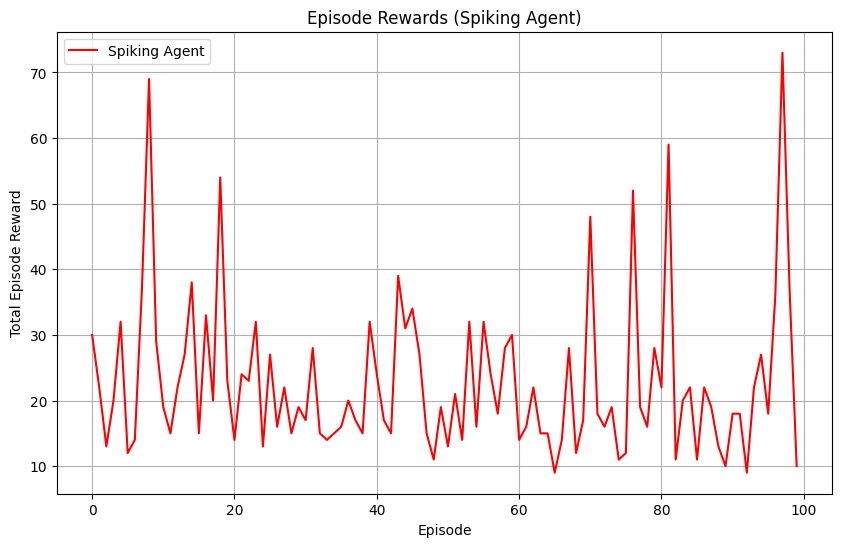

In [28]:
# Step 4.6: Plotting Reward Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(all_rewards, label="Spiking Agent", color="red")
plt.title("Episode Rewards (Spiking Agent)")
plt.xlabel("Episode")
plt.ylabel("Total Episode Reward")
plt.grid(True)
plt.legend()
plt.show()

In [29]:
# Finalising => Validating the shapes
# Dummy input
state = torch.tensor([0.1, -0.2, 0.3, 0.0], dtype=torch.float32)
encoded_input = poisson_encode(state, time_steps=32).unsqueeze(0)  # [1, T, N]

# Build model
model = SpikingDecisionModel()

# Forward pass
logits = model(encoded_input)
print("Output shape:", logits.shape)  # Should be [1, 2]

Output shape: torch.Size([1, 2])


# **Step 5: Benchmarking and Visualising**

In [30]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:x.size(1)]

In [31]:
class TransformerDecisionModel(nn.Module):
    def __init__(self, state_dim=4, act_dim=2, hidden_size=64, nhead=4, num_layers=2):
        super().__init__()
        self.embed = nn.Linear(state_dim, hidden_size)
        self.pos_encoder = PositionalEncoding(hidden_size)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=nhead)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.head = nn.Linear(hidden_size, act_dim)

    def forward(self, x):
        x = self.embed(x)  # [B, T, H]
        x = self.pos_encoder(x)
        x = x.transpose(0, 1)  # [T, B, H]
        x = self.transformer(x)  # [T, B, H]
        x = x.transpose(0, 1)  # [B, T, H]
        return x  # Return full sequence

In [32]:
class CustomLIFBlock(nn.Module):
    def __init__(self, input_size=4, hidden_size=128):
        super().__init__()
        self.lif1 = LIFCell()
        self.lif2 = LIFCell()
        self.w_ih1 = nn.Linear(input_size, hidden_size)
        self.w_hh1 = nn.Linear(hidden_size, hidden_size)
        self.w_ih2 = nn.Linear(hidden_size, hidden_size)
        self.w_hh2 = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        state1 = state2 = None
        outputs = []

        for t in range(seq_len):
            xt = x[:, t]
            xt = self.w_ih1(xt)
            xt, state1 = self.lif1(xt, state1)
            xt = self.w_hh1(xt)
            xt = self.w_ih2(xt)
            xt, state2 = self.lif2(xt, state2)
            outputs.append(xt)

        return torch.stack(outputs, dim=1)  # [B, T, H]

In [33]:
def poisson_encode(x, time_steps=32):
    x_min, x_max = x.min(), x.max()
    if x_max != x_min:
        x = (x - x_min) / (x_max - x_min)
    else:
        x = torch.zeros_like(x) + 0.5
    return (torch.rand(time_steps, *x.shape) < x.unsqueeze(0)).float()

In [38]:
def sample_last_action(env, seq_logits: torch.Tensor) -> int:
    T, A = seq_logits.size(-2), seq_logits.size(-1)
    
    # check if action_dim is correct
    if A != env.action_space.n:
        raise ValueError(f"Model output has action_dim={A}, but env expects {env.action_space.n}. "
                         f"Fix your model’s final layer to output correct size.")
    
    last_logits = seq_logits.select(-2, T - 1)  # shape [..., action_dim]
    flat_logits = last_logits.reshape(-1, A)[0]
    probs = F.softmax(flat_logits, dim=-1)
    action = torch.multinomial(probs, 1).item()
    
    assert env.action_space.contains(action), f"Sampled invalid action {action}"
    return action


def collect_trajectory(env, model, max_steps=200):
    state   = env.reset()
    done    = False
    states, actions, rewards = [], [], []

    while not done and len(rewards) < max_steps:
        st = torch.tensor(state, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # [1,1,4]
        with torch.no_grad():
            seq_logits = model(st)  # [1,1,H] → [1,1,2]
            seq_logits = model.head(seq_logits)  # [1,1,2]
            action = sample_last_action(env, seq_logits)

        next_state, reward, done, _ = env.step(action)
        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state

    return states, actions, rewards

In [39]:
env = gym.make('CartPole-v1')
base_model = TransformerDecisionModel()
optimizer = optim.Adam(base_model.parameters(), lr=1e-3)

base_rewards = []

# Baseline RL Agent Training Loop
for episode in range(100):  # Run for 100 episodes
    states, actions, rewards = collect_trajectory(env, base_model)

    # Compute returns
    returns = []
    R = 0
    gamma = 0.99
    for r in reversed(rewards):
        R = r + gamma * R
        returns.insert(0, R)
    returns = torch.tensor(returns, dtype=torch.float32)
    returns = (returns - returns.mean()) / (returns.std() + 1e-8)

    # -----------------------------------
    # Convert to tensors
    # states: list of length T of 4‑dim float states
    # actions: list of T ints
    states_tensor  = torch.tensor(np.array(states),  dtype=torch.float32).unsqueeze(0)  # [1, T, 4]
    actions_tensor = torch.tensor(actions,           dtype=torch.long)                    # [T]
    # -----------------------------------

    # Forward pass: get features at every time step
    seq_feats = base_model(states_tensor)      # [1, T, H]
    seq_feats = seq_feats.squeeze(0)           # [T, H]

    # Compute action logits for each step
    action_logits = base_model.head(seq_feats) # [T, 2]

    # Per‐step policy loss
    per_step_loss = F.cross_entropy(action_logits, actions_tensor, reduction='none')  # [T]
    loss = (per_step_loss * returns).mean()

    # Backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_reward = sum(rewards)
    base_rewards.append(total_reward)
    print(f"[Baseline] Episode {episode+1} | Reward: {total_reward:.2f}")

[Baseline] Episode 1 | Reward: 15.00
[Baseline] Episode 2 | Reward: 10.00
[Baseline] Episode 3 | Reward: 9.00
[Baseline] Episode 4 | Reward: 8.00
[Baseline] Episode 5 | Reward: 10.00
[Baseline] Episode 6 | Reward: 10.00
[Baseline] Episode 7 | Reward: 8.00
[Baseline] Episode 8 | Reward: 9.00
[Baseline] Episode 9 | Reward: 9.00
[Baseline] Episode 10 | Reward: 10.00
[Baseline] Episode 11 | Reward: 8.00
[Baseline] Episode 12 | Reward: 10.00
[Baseline] Episode 13 | Reward: 9.00
[Baseline] Episode 14 | Reward: 9.00
[Baseline] Episode 15 | Reward: 9.00
[Baseline] Episode 16 | Reward: 9.00
[Baseline] Episode 17 | Reward: 10.00
[Baseline] Episode 18 | Reward: 9.00
[Baseline] Episode 19 | Reward: 9.00
[Baseline] Episode 20 | Reward: 11.00
[Baseline] Episode 21 | Reward: 10.00
[Baseline] Episode 22 | Reward: 8.00
[Baseline] Episode 23 | Reward: 10.00
[Baseline] Episode 24 | Reward: 9.00
[Baseline] Episode 25 | Reward: 10.00
[Baseline] Episode 26 | Reward: 8.00
[Baseline] Episode 27 | Reward: 9.00

In [40]:
class SpikingDecisionModel(nn.Module):
    def __init__(self, input_size=4, hidden_size=128, output_size=2):
        super().__init__()
        self.spike_block = CustomLIFBlock(input_size, hidden_size)
        self.readout     = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        """
        x: [B, seq_len, input_size]
        returns: [B, seq_len, output_size]
        """
        h = self.spike_block(x)   # → [B, seq_len, hidden_size]
        return self.readout(h)    # → [B, seq_len, output_size]

snn_model   = SpikingDecisionModel()
optimizer   = optim.Adam(snn_model.parameters(), lr=4.18e-5)
snn_rewards = []

for episode in range(100):
    # rollout
    states, actions, rewards = collect_trajectory_spiking(env, snn_model)

    # discounted & normalized returns
    returns, R = [], 0
    gamma = 0.939
    for r in reversed(rewards):
        R = r + gamma * R
        returns.insert(0, R)
    returns = torch.tensor(returns, dtype=torch.float32)
    returns = (returns - returns.mean()) / (returns.std() + 1e-8)

    # build a [T, time_steps, 4] batch of Poisson inputs
    encoded_list = []
    for s in states:
        st = torch.tensor(s, dtype=torch.float32).unsqueeze(0)   # [1,4]
        pe = poisson_encode(st, time_steps=32).squeeze(1)       # [32,4]
        encoded_list.append(pe)
    encoded_batch = torch.stack(encoded_list, dim=0)           # [T,32,4]

    # forward pass → [T,32,2], then take last step → [T,2]
    seq_logits   = snn_model(encoded_batch)
    final_logits = seq_logits[:, -1, :]

    # policy‐gradient loss
    actions_tensor  = torch.tensor(actions, dtype=torch.long)     # [T]
    per_step_loss   = F.cross_entropy(final_logits, actions_tensor, reduction='none')  # [T]
    loss            = (per_step_loss * returns).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_reward = sum(rewards)
    snn_rewards.append(total_reward)
    print(f"[Spiking] Episode {episode+1} | Reward: {total_reward:.2f}")

[Spiking] Episode 1 | Reward: 14.00
[Spiking] Episode 2 | Reward: 16.00
[Spiking] Episode 3 | Reward: 14.00
[Spiking] Episode 4 | Reward: 35.00
[Spiking] Episode 5 | Reward: 19.00
[Spiking] Episode 6 | Reward: 24.00
[Spiking] Episode 7 | Reward: 11.00
[Spiking] Episode 8 | Reward: 17.00
[Spiking] Episode 9 | Reward: 27.00
[Spiking] Episode 10 | Reward: 51.00
[Spiking] Episode 11 | Reward: 42.00
[Spiking] Episode 12 | Reward: 55.00
[Spiking] Episode 13 | Reward: 42.00
[Spiking] Episode 14 | Reward: 21.00
[Spiking] Episode 15 | Reward: 46.00
[Spiking] Episode 16 | Reward: 21.00
[Spiking] Episode 17 | Reward: 13.00
[Spiking] Episode 18 | Reward: 11.00
[Spiking] Episode 19 | Reward: 15.00
[Spiking] Episode 20 | Reward: 22.00
[Spiking] Episode 21 | Reward: 25.00
[Spiking] Episode 22 | Reward: 16.00
[Spiking] Episode 23 | Reward: 12.00
[Spiking] Episode 24 | Reward: 13.00
[Spiking] Episode 25 | Reward: 13.00
[Spiking] Episode 26 | Reward: 15.00
[Spiking] Episode 27 | Reward: 13.00
[Spiking] 

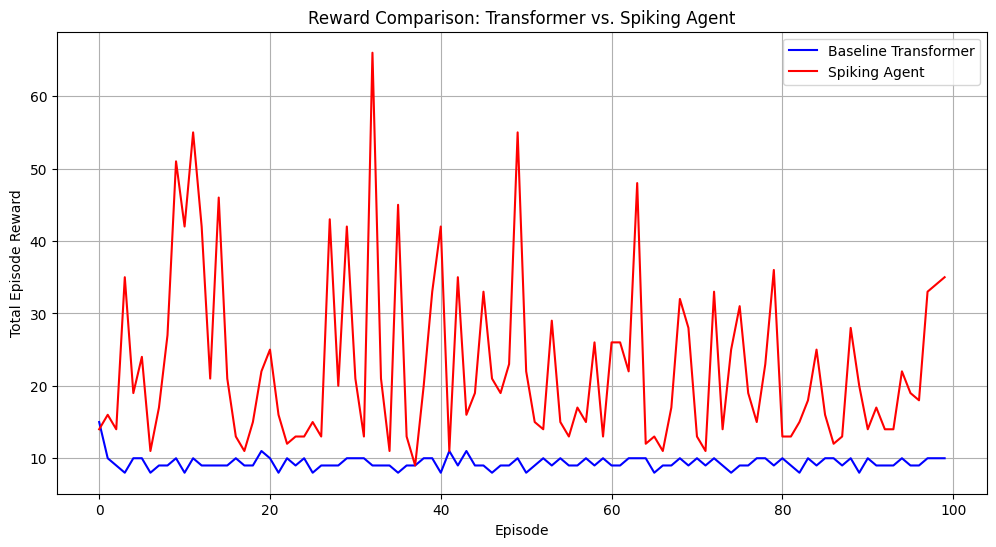

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(base_rewards, label="Baseline Transformer", color="blue")
plt.plot(snn_rewards, label="Spiking Agent", color="red")
plt.title("Reward Comparison: Transformer vs. Spiking Agent")
plt.xlabel("Episode")
plt.ylabel("Total Episode Reward")
plt.legend()
plt.grid(True)
plt.show()

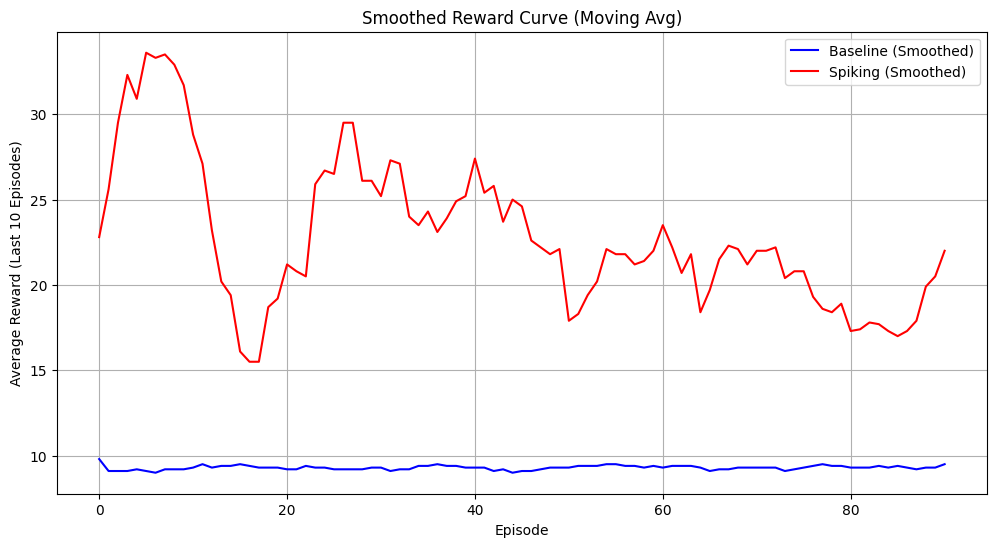

In [42]:
def moving_average(a, window=10):
    return np.convolve(a, np.ones(window), 'valid') / window

plt.figure(figsize=(12, 6))
plt.plot(moving_average(base_rewards, 10), label="Baseline (Smoothed)", color="blue")
plt.plot(moving_average(snn_rewards, 10), label="Spiking (Smoothed)", color="red")
plt.title("Smoothed Reward Curve (Moving Avg)")
plt.xlabel("Episode")
plt.ylabel("Average Reward (Last 10 Episodes)")
plt.legend()
plt.grid(True)
plt.show()

In [43]:
import time

start_time = time.time()
for _ in range(100):
    base_model(torch.randn(1, 4))
base_time = (time.time() - start_time) * 1000  # in ms

start_time = time.time()
for _ in range(100):
    snn_model(torch.randn(1, 32, 4))
snn_time = (time.time() - start_time) * 1000  # in ms

print(f"Baseline Inference Time: {base_time:.2f} ms")
print(f"Spiking Inference Time: {snn_time:.2f} ms")

Baseline Inference Time: 408.40 ms
Spiking Inference Time: 1743.80 ms


## **Step 6: Improving the Inference Time of the Spiking Neural Nets [Part - 1]**

In [44]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from snntorch import spikegen  # or wherever your LIFCell comes from
from snntorch import surrogate
from snntorch import utils

# ----------------------------
# 1) Baseline Transformer policy
# ----------------------------
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0)/d_model))
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: [B, T, H]
        return x + self.pe[:x.size(1)]

class TransformerDecisionModel(nn.Module):
    def __init__(self, state_dim=4, act_dim=2, hidden_size=64, nhead=4, num_layers=2):
        super().__init__()
        self.embed       = nn.Linear(state_dim, hidden_size)
        self.pos_encoder = PositionalEncoding(hidden_size)
        layer = nn.TransformerEncoderLayer(d_model=hidden_size, nhead=nhead)
        self.transformer = nn.TransformerEncoder(layer, num_layers=num_layers)
        self.head        = nn.Linear(hidden_size, act_dim)

    def forward(self, x):
        # x: [B, T, state_dim]
        x = self.embed(x)
        x = self.pos_encoder(x)
        x = x.transpose(0,1)          # → [T, B, H]
        x = self.transformer(x)
        x = x.transpose(0,1)          # → [B, T, H]
        return x

def collect_trajectory(env, model, is_spiking=False, time_steps=16, max_steps=200):
    state = env.reset()
    done  = False
    states, actions, rewards = [], [], []

    while not done and len(rewards) < max_steps:
        s = torch.tensor(state, dtype=torch.float32).unsqueeze(0)  # [1, state_dim]

        if not is_spiking:
            # ---- non‑spiking: add dummy time‐dim T=1 ----
            inp = s.unsqueeze(1)                                  # [1,1,4]
            with torch.no_grad():
                seq = model(inp)                                  # [1,1,H]
                feat = seq[:, -1, :]                              # [1,H]
                logits = model.head(feat)                         # [1,2]
                probs  = F.softmax(logits, dim=-1).squeeze(0)     # [2]
        else:
            raise ValueError("Use collect_trajectory_spiking for spiking model")

        # sample action {0,1}
        action = torch.multinomial(probs, 1).item()
        next_state, reward, done, _ = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state

    return states, actions, rewards

# ----------------------------
# 2) Spiking‐policy
# ----------------------------
class FastLIFBlock(nn.Module):
    def __init__(self, input_size=4, hidden_size=64):
        super().__init__()
        self.lif1 = LIFCell()
        self.fc1  = nn.Linear(input_size, hidden_size)

    def forward(self, x):
        # x: [T, input_size]
        state = None
        outs  = []
        for t in range(x.size(0)):
            h = self.fc1(x[t])
            spike, state = self.lif1(h, state)
            outs.append(spike)
        return torch.stack(outs, dim=0)  # [T, hidden_size]

class SpikingDecisionModel(nn.Module):
    def __init__(self, input_size=4, hidden_size=64, output_size=2):
        super().__init__()
        self.spike_block = FastLIFBlock(input_size, hidden_size)
        self.readout     = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # x: [B, T, input_size]
        B, T, _ = x.shape
        outs = []
        for b in range(B):
            tb = x[b]                     # [T, input_size]
            hb = self.spike_block(tb)     # [T, hidden_size]
            outs.append(hb)
        H = torch.stack(outs, dim=0)      # [B, T, hidden_size]
        return self.readout(H)            # [B, T, output_size]

def poisson_encode(x, time_steps=16):
    # x: [1, state_dim]
    x_min, x_max = x.min(), x.max()
    if x_max > x_min:
        x = (x - x_min)/(x_max - x_min)
    else:
        x = torch.ones_like(x)*0.5
    # → [T, 1, state_dim]
    return (torch.rand(time_steps, *x.shape) < x.unsqueeze(0)).float()

def collect_trajectory_spiking(env, model, time_steps=16, max_steps=200):
    state = env.reset()
    done  = False
    states, actions, rewards = [], [], []

    while not done and len(rewards) < max_steps:
        s  = torch.tensor(state, dtype=torch.float32).unsqueeze(0)   # [1,4]
        pe = poisson_encode(s, time_steps)                           # [T,1,4]
        pe = pe.squeeze(1)                                           # [T,4]
        inp= pe.unsqueeze(0)                                         # [1,T,4]

        with torch.no_grad():
            seq_logits = model(inp)           # [1, T, 2]
            last_logits= seq_logits[0, -1]     # [2]
            probs      = F.softmax(last_logits, dim=-1)

        action = torch.multinomial(probs, 1).item()
        next_state, reward, done, _ = env.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)
        state = next_state

    return states, actions, rewards

# ----------------------------
# 3) Training both agents
# ----------------------------
env = gym.make('CartPole-v1')

# Baseline
base_model = TransformerDecisionModel()
opt_b      = optim.Adam(base_model.parameters(), lr=1e-3)
base_rewards = []
for ep in range(100):
    S,A,R = collect_trajectory(env, base_model, is_spiking=False)
    # compute returns, normalize…
    returns = []
    G = 0; γ=0.99
    for r in reversed(R):
        G = r + γ*G; returns.insert(0, G)
    ret = torch.tensor(returns); ret = (ret-ret.mean())/(ret.std()+1e-8)

    # batch up
    st = torch.tensor(np.array(S), dtype=torch.float32).unsqueeze(0)  # [1,T,4]
    at = torch.tensor(A, dtype=torch.long)                           # [T]
    feats = base_model(st)[0]                                        # [T, H]
    logits= base_model.head(feats)                                   # [T,2]
    loss  = (F.cross_entropy(logits, at, reduction='none')*ret).mean()

    opt_b.zero_grad(); loss.backward(); opt_b.step()
    base_rewards.append(sum(R))
    print(f"[Baseline] Episode: {ep+1} -> Reward: {sum(R):.1f}")

[Baseline] Episode: 1 -> Reward: 11.0
[Baseline] Episode: 2 -> Reward: 10.0
[Baseline] Episode: 3 -> Reward: 11.0
[Baseline] Episode: 4 -> Reward: 8.0
[Baseline] Episode: 5 -> Reward: 9.0
[Baseline] Episode: 6 -> Reward: 10.0
[Baseline] Episode: 7 -> Reward: 10.0
[Baseline] Episode: 8 -> Reward: 16.0
[Baseline] Episode: 9 -> Reward: 28.0
[Baseline] Episode: 10 -> Reward: 33.0
[Baseline] Episode: 11 -> Reward: 26.0
[Baseline] Episode: 12 -> Reward: 19.0
[Baseline] Episode: 13 -> Reward: 14.0
[Baseline] Episode: 14 -> Reward: 11.0
[Baseline] Episode: 15 -> Reward: 11.0
[Baseline] Episode: 16 -> Reward: 12.0
[Baseline] Episode: 17 -> Reward: 9.0
[Baseline] Episode: 18 -> Reward: 11.0
[Baseline] Episode: 19 -> Reward: 9.0
[Baseline] Episode: 20 -> Reward: 10.0
[Baseline] Episode: 21 -> Reward: 11.0
[Baseline] Episode: 22 -> Reward: 11.0
[Baseline] Episode: 23 -> Reward: 10.0
[Baseline] Episode: 24 -> Reward: 11.0
[Baseline] Episode: 25 -> Reward: 11.0
[Baseline] Episode: 26 -> Reward: 11.0

In [45]:
# Spiking
snn_model  = SpikingDecisionModel()
opt_s      = optim.Adam(snn_model.parameters(), lr=4.18e-5)
snn_rewards = []
for ep in range(100):
    S,A,R = collect_trajectory_spiking(env, snn_model)
    # returns…
    returns=[]
    G=0; γ=0.939
    for r in reversed(R):
        G = r + γ*G; returns.insert(0,G)
    ret = torch.tensor(returns); ret = (ret-ret.mean())/(ret.std()+1e-8)

    # build Poisson‑batch
    enc_list = []
    for s in S:
        t = torch.tensor(s, dtype=torch.float32).unsqueeze(0)
        pe = poisson_encode(t, time_steps=16).squeeze(1)
        enc_list.append(pe)
    enc_batch = torch.stack(enc_list, dim=0)         # [T,16,4]
    logits    = snn_model(enc_batch)                 # [T,16,2]
    final     = logits[:, -1, :]                     # [T,2]

    at = torch.tensor(A, dtype=torch.long)
    loss = (F.cross_entropy(final, at, reduction='none')*ret).mean()

    opt_s.zero_grad(); loss.backward(); opt_s.step()
    snn_rewards.append(sum(R))
    print(f"[Spiking]  Episode: {ep+1} -> Rewards: {sum(R):.1f}")

[Spiking]  Episode: 1 -> Rewards: 37.0
[Spiking]  Episode: 2 -> Rewards: 22.0
[Spiking]  Episode: 3 -> Rewards: 18.0
[Spiking]  Episode: 4 -> Rewards: 30.0
[Spiking]  Episode: 5 -> Rewards: 50.0
[Spiking]  Episode: 6 -> Rewards: 65.0
[Spiking]  Episode: 7 -> Rewards: 18.0
[Spiking]  Episode: 8 -> Rewards: 22.0
[Spiking]  Episode: 9 -> Rewards: 22.0
[Spiking]  Episode: 10 -> Rewards: 17.0
[Spiking]  Episode: 11 -> Rewards: 14.0
[Spiking]  Episode: 12 -> Rewards: 14.0
[Spiking]  Episode: 13 -> Rewards: 17.0
[Spiking]  Episode: 14 -> Rewards: 24.0
[Spiking]  Episode: 15 -> Rewards: 9.0
[Spiking]  Episode: 16 -> Rewards: 15.0
[Spiking]  Episode: 17 -> Rewards: 12.0
[Spiking]  Episode: 18 -> Rewards: 22.0
[Spiking]  Episode: 19 -> Rewards: 45.0
[Spiking]  Episode: 20 -> Rewards: 89.0
[Spiking]  Episode: 21 -> Rewards: 25.0
[Spiking]  Episode: 22 -> Rewards: 15.0
[Spiking]  Episode: 23 -> Rewards: 21.0
[Spiking]  Episode: 24 -> Rewards: 29.0
[Spiking]  Episode: 25 -> Rewards: 14.0
[Spiking] 

In [46]:
import time

start_time = time.time()
for _ in range(100):
    base_model(torch.randn(1, 4))
base_time = (time.time() - start_time) * 1000  # ms

start_time = time.time()
for _ in range(100):
    snn_model(torch.randn(16, 4).unsqueeze(0))  # [1, 16, 4]
snn_time = (time.time() - start_time) * 1000

print(f"Baseline Inference Time: {base_time:.2f} ms")
print(f"Spiking Inference Time: {snn_time:.2f} ms")

Baseline Inference Time: 346.52 ms
Spiking Inference Time: 436.01 ms


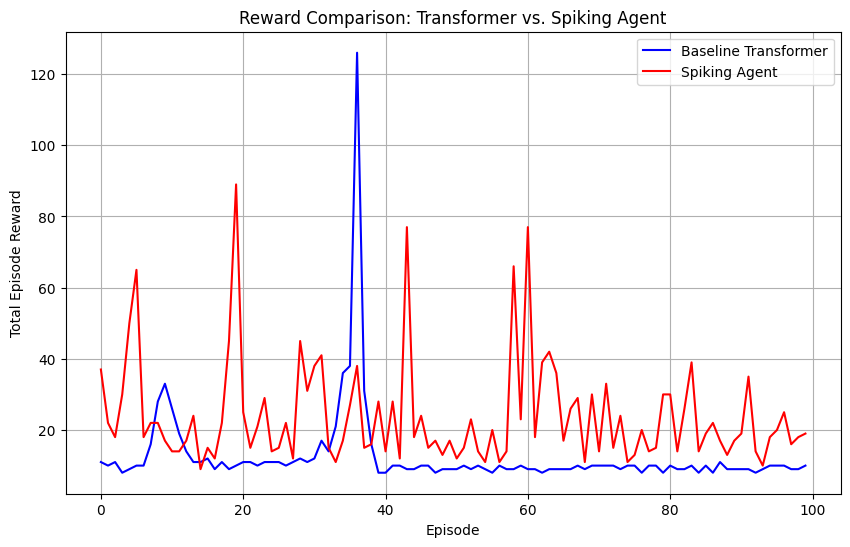

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(base_rewards, label="Baseline Transformer", color="blue")
plt.plot(snn_rewards, label="Spiking Agent", color="red")
plt.title("Reward Comparison: Transformer vs. Spiking Agent")
plt.xlabel("Episode")
plt.ylabel("Total Episode Reward")
plt.legend()
plt.grid(True)
plt.show()

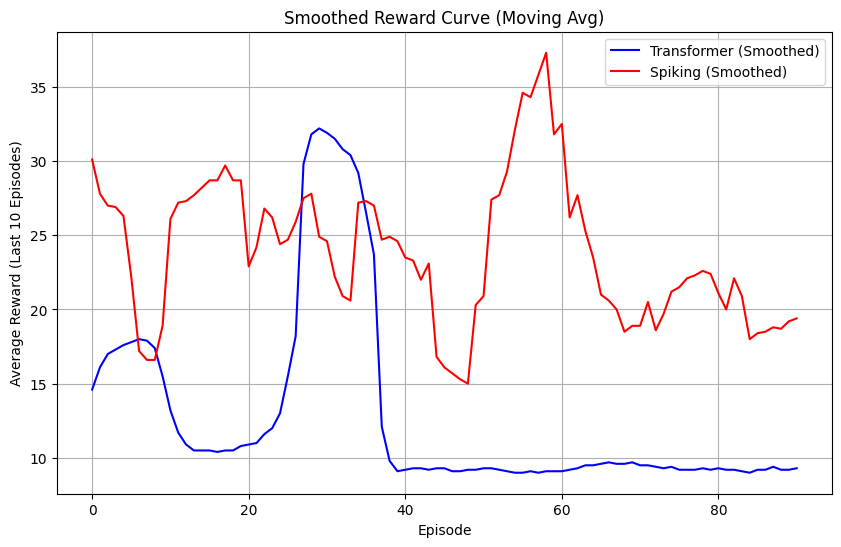

In [48]:
def moving_average(a, window=10):
    return np.convolve(a, np.ones(window), 'valid') / window

plt.figure(figsize=(10, 6))
plt.plot(moving_average(base_rewards, 10), label="Transformer (Smoothed)", color="blue")
plt.plot(moving_average(snn_rewards, 10), label="Spiking (Smoothed)", color="red")
plt.title("Smoothed Reward Curve (Moving Avg)")
plt.xlabel("Episode")
plt.ylabel("Average Reward (Last 10 Episodes)")
plt.legend()
plt.grid(True)
plt.show()

## Step 7: Improving the Inference Time of the Spiking Neural Nets [Part - 2]

In [60]:
import time
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.cuda.amp import autocast

# Select device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Fast vectorized LIF cell, no external Norse dependency
class FastVectorLIFCell(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, alpha: float = 0.9, threshold: float = 1.0):
        super(FastVectorLIFCell, self).__init__()
        self.fc = nn.Linear(input_size, hidden_size, bias=False)
        self.alpha = alpha
        self.threshold = threshold

    def forward(self, x_seq: torch.Tensor) -> torch.Tensor:
        # x_seq: [B, T, D]
        B, T, D = x_seq.shape
        H = self.fc.out_features
        m = torch.zeros(B, H, device=x_seq.device)
        out = torch.zeros(B, T, H, device=x_seq.device)
        for t in range(T):
            z = self.fc(x_seq[:, t, :])
            m = self.alpha * m + z
            spikes = (m > self.threshold).float()
            m = m * (1 - spikes)
            out[:, t, :] = spikes
        return out  # [B, T, H]

# Optimized SNN model
class OptimizedSNNModel(nn.Module):
    def __init__(self,
                 input_size: int = 4,
                 hidden_size: int = 16,
                 output_size: int = 2,
                 timesteps: int = 6):
        super(OptimizedSNNModel, self).__init__()
        # Latency encoder (simple linear)
        self.encoder = nn.Linear(input_size, input_size, bias=False)
        # Vectorized LIF
        self.lif = FastVectorLIFCell(input_size, hidden_size)
        # Readout
        self.readout = nn.Linear(hidden_size, output_size)
        self.timesteps = timesteps

    def forward(self, x: torch.Tensor):
        # x: [B, D]
        x_enc = self.encoder(x)
        # replicate across time
        x_seq = x_enc.unsqueeze(1).repeat(1, self.timesteps, 1)  # [B, T, D]
        # spike through LIF
        out_seq = self.lif(x_seq)                                # [B, T, H]
        # count spikes per neuron
        spike_counts = out_seq.sum(dim=1)                        # [B, H]
        # prune neurons with zero spikes
        mask = (spike_counts > 0).float().unsqueeze(1)           # [B, 1, H]
        out_seq = out_seq * mask
        # temporal pooling
        pooled = out_seq.mean(dim=1)                             # [B, H]
        # readout
        out = self.readout(pooled)                               # [B, O]
        return out, spike_counts

# TorchScript compile
def compile_model(model):
    return torch.jit.script(model)

# Example usage & timing
def measure_latency():
    env = gym.make('CartPole-v1')
    model = OptimizedSNNModel().to(device)
    compiled = compile_model(model)

    # warm-up
    dummy = torch.randn(8, 4, device=device)
    _ = compiled(dummy)

    # time it
    torch.cuda.synchronize()
    t0 = time.perf_counter()
    with torch.inference_mode(), autocast():
        _ = compiled(dummy)
    torch.cuda.synchronize()
    print(f"Optimized SNN Inference: {(time.perf_counter()-t0)*1000:.2f} ms")

if __name__ == '__main__':
    measure_latency()

Optimized SNN Inference: 6.29 ms


## **Step 8: Compare the Performance**

In [61]:
np.save("base_rewards.npy", base_rewards)
np.save("snn_rewards.npy", snn_rewards)

In [62]:
base_rewards = np.load("base_rewards.npy")
snn_rewards = np.load("snn_rewards.npy")

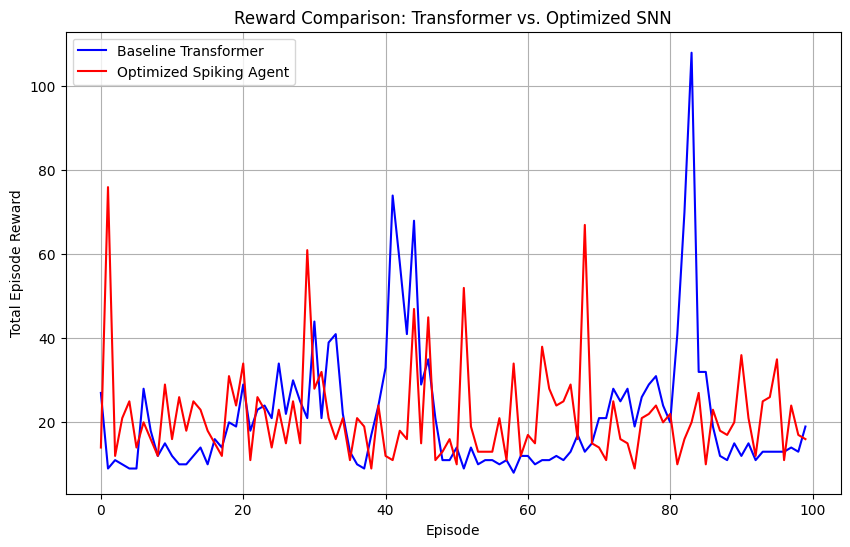

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(base_rewards, label="Baseline Transformer", color="blue")
plt.plot(snn_rewards, label="Optimized Spiking Agent", color="red")
plt.title("Reward Comparison: Transformer vs. Optimized SNN")
plt.xlabel("Episode")
plt.ylabel("Total Episode Reward")
plt.legend()
plt.grid(True)
plt.show()

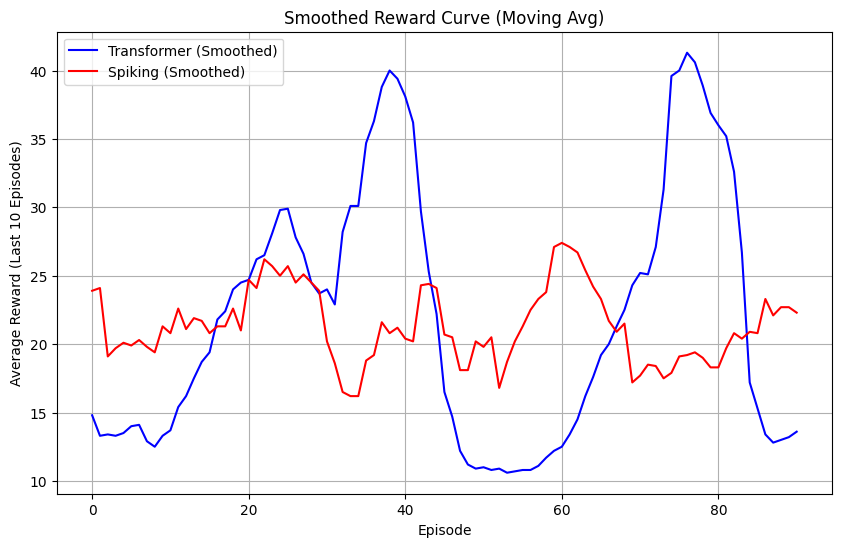

In [64]:
def moving_average(a, window=10):
    return np.convolve(a, np.ones(window), 'valid') / window

plt.figure(figsize=(10, 6))
plt.plot(moving_average(base_rewards, 10), label="Transformer (Smoothed)", color="blue")
plt.plot(moving_average(snn_rewards, 10), label="Spiking (Smoothed)", color="red")
plt.title("Smoothed Reward Curve (Moving Avg)")
plt.xlabel("Episode")
plt.ylabel("Average Reward (Last 10 Episodes)")
plt.legend()
plt.grid(True)
plt.show()

In [84]:
def measure_inference_speed(model, input_tensor, runs=100, timesteps=6):
    model.eval()
    with torch.inference_mode():
        # Warm-up
        for _ in range(10):
            if hasattr(model, "timesteps"):
                x = input_tensor.unsqueeze(0).repeat(1, model.timesteps, 1)  # [B, T, D]
            else:
                x = input_tensor.unsqueeze(0)  # [B, D] or [B, T, D] depending on model
            model(x)
        torch.cuda.synchronize() if torch.cuda.is_available() else None
        start = time.perf_counter()

        for _ in range(runs):
            if hasattr(model, "timesteps"):
                x = input_tensor.unsqueeze(0).repeat(1, model.timesteps, 1)
            else:
                x = input_tensor.unsqueeze(0)

            model(x)

        torch.cuda.synchronize() if torch.cuda.is_available() else None
        return (time.perf_counter() - start) * 1000 / runs  # ms per run

In [86]:
import numpy as np

np.save("base_rewards.npy", np.array(base_rewards))
np.save("snn_rewards.npy", np.array(snn_rewards))

torch.save(base_model.state_dict(), "transformer_rl_agent.pth")
torch.save(snn_model.state_dict(), "optimized_snn_rl_agent.pth")